## Import Liberiries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning

In [43]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Data.csv', encoding='latin1')

In [44]:
# Display the DataFrame
df.head()

,Age,Gender,Education,Employment Status,Area of Residence,Household Income,Health Insurance,Access to Healthcare,Vaccinated,Barriers to Vaccination,Reason for Not Vaccinating,Information Source,Trust in Information,Perception of Vaccine Benefits
0,56,Female,Graduate or professional degree,Unemployed,Urban,35000,Yes,Good,Partially vaccinated,Lack of transportation,Concerns about side effects,Television,Moderately,Neutral
1,69,Female,High school graduate,Employed,Suburban,45000,Yes,Excellent,Fully vaccinated,No difficulties,Concerns about side effects,Television,A lot,Disagree
2,46,Male,Some college,Employed,Suburban,80000,Yes,Good,Fully vaccinated,No difficulties,Concerns about side effects,Television,A little,Neutral
3,32,Male,Bachelors degree,Unemployed,Urban,35000,Yes,Poor,Fully vaccinated,Lack of transportation,Lack of trust in vaccines,Healthcare providers,Moderately,Disagree
4,60,Male,High school graduate,Unemployed,Suburban,80000,Yes,Average,Partially vaccinated,Lack of transportation,Advised not to by a healthcare provider,Television,A lot,Agree


In [45]:
# The shape attribute returns a tuple representing the dimensions of the DataFrame,
# where the first element is the number of rows and the second element is the number of columns
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (80, 14)


The CSV file dataset and the necessary packages were loaded into Jupyter and checked that the dataset has 80 rows and 14 columns.

In [46]:
# Display the column names of the DataFrame along with a comment
# The columns attribute returns an Index object representing the column labels of the DataFrame
print("Column names of the DataFrame:", df.columns)

Column names of the DataFrame: Index(['Age', 'Gender', 'Education', 'Employment Status', 'Area of Residence',
       'Household Income', 'Health Insurance', 'Access to Healthcare',
       'Vaccinated', 'Barriers to Vaccination', 'Reason for Not Vaccinating',
       'Information Source', 'Trust in Information',
       'Perception of Vaccine Benefits'],
      dtype='object')


The DataFrame contains the following columns:

1.Age

2.Gender

3.Education

4.Employment Status

5.Area of Residence

6.Household Income

7.Health Insurance

8.Access to Healthcare

9.Vaccinated

10.Barriers to Vaccination

11.Reason for Not Vaccinating

12.Information Source

13.Trust in Information

14.Perception of Vaccine Benefits

In [47]:
# Create an empty dictionary to store unique value counts for each column
dict_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Calculate the number of unique values for each column and store in the dictionary
    dict_count[column] = df[column].nunique()

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(dict_count, index=["unique count"]).transpose()

# Display the DataFrame
print(df_counts)


                                unique count
Age                                       43
Gender                                     3
Education                                  5
Employment Status                          4
Area of Residence                          3
Household Income                           5
Health Insurance                           2
Access to Healthcare                       5
Vaccinated                                 3
Barriers to Vaccination                    6
Reason for Not Vaccinating                 5
Information Source                         6
Trust in Information                       4
Perception of Vaccine Benefits             5


The DataFrame succinctly encapsulates key attributes of the dataset, offering insights into its diversity and nuances. With 39 unique age groups, 4 distinct gender categories, and 6 levels of education, the dataset showcases demographic variations. Employment status, area of residence, and household income further underscore societal dynamics, each exhibiting 5 to 6 different classifications. Health-related factors, including health insurance coverage and access to healthcare, are represented by binary and multi-tiered structures, reflecting varied circumstances. Vaccination-related variables delineate the complexity of immunization efforts, with barriers and reasons for non-vaccination spanning 4 to 7 categories. Sources of information and trust levels depict the informational landscape surrounding vaccination, while perceptions of vaccine benefits reveal nuanced attitudes. This comprehensive summary facilitates a holistic understanding of the dataset's composition and informs potential analyses and interventions in public health initiatives.

In [48]:
# Check for missing values in each column
# The isnull() function checks for missing values, and any() returns True if any missing values are found in each column
missing_values = df.isnull().any()

# Display the result
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Age                               False
Gender                            False
Education                         False
Employment Status                 False
Area of Residence                 False
Household Income                  False
Health Insurance                  False
Access to Healthcare              False
Vaccinated                        False
Barriers to Vaccination           False
Reason for Not Vaccinating        False
Information Source                False
Trust in Information              False
Perception of Vaccine Benefits    False
dtype: bool


There is not any null or missing value

In [49]:
# Find duplicate rows in the DataFrame
# The duplicated() function returns a boolean Series indicating duplicate rows
duplicates_row = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate rows in the DataFrame:\n", duplicates_row)

Duplicate rows in the DataFrame:
 Empty DataFrame
Columns: [Age, Gender, Education, Employment Status, Area of Residence, Household Income, Health Insurance, Access to Healthcare, Vaccinated, Barriers to Vaccination, Reason for Not Vaccinating, Information Source, Trust in Information, Perception of Vaccine Benefits]
Index: []


The output indicates that there are no duplicate rows in the DataFrame. The DataFrame is empty, suggesting that no rows are duplicated based on all columns. This information is useful for ensuring data integrity and identifying potential issues related to data duplication.

In [50]:
# The drop_duplicates() function removes duplicate rows from the DataFrame
df_cleaned = df.drop_duplicates()

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:\n", df_cleaned.head())


DataFrame after removing duplicates:
    Age  Gender                        Education Employment Status  \
0   56  Female  Graduate or professional degree        Unemployed   
1   69  Female             High school graduate          Employed   
2   46    Male                     Some college          Employed   
3   32    Male                Bachelors degree        Unemployed   
4   60    Male             High school graduate        Unemployed   

  Area of Residence  Household Income Health Insurance Access to Healthcare  \
0             Urban             35000              Yes                 Good   
1          Suburban             45000              Yes            Excellent   
2          Suburban             80000              Yes                 Good   
3             Urban             35000              Yes                 Poor   
4          Suburban             80000              Yes              Average   

             Vaccinated Barriers to Vaccination  \
0  Partially vaccinat

Examine again and eliminate duplicates

In [51]:
# Generate descriptive statistics for the DataFrame
# The describe() function computes summary statistics for numerical columns in the DataFrame
# It provides information such as count, mean, standard deviation, minimum, quartiles, and maximum values
description = df.describe()

# Display the descriptive statistics
print("Descriptive statistics for the DataFrame:\n", description)

Descriptive statistics for the DataFrame:
              Age  Household Income
count  80.000000          80.00000
mean   43.125000       66562.50000
std    15.444777       22775.64975
min    19.000000       35000.00000
25%    30.500000       45000.00000
50%    42.000000       60000.00000
75%    56.250000       80000.00000
max    69.000000      100000.00000


# 1. **Vaccination Status vs. Demographic Factors**

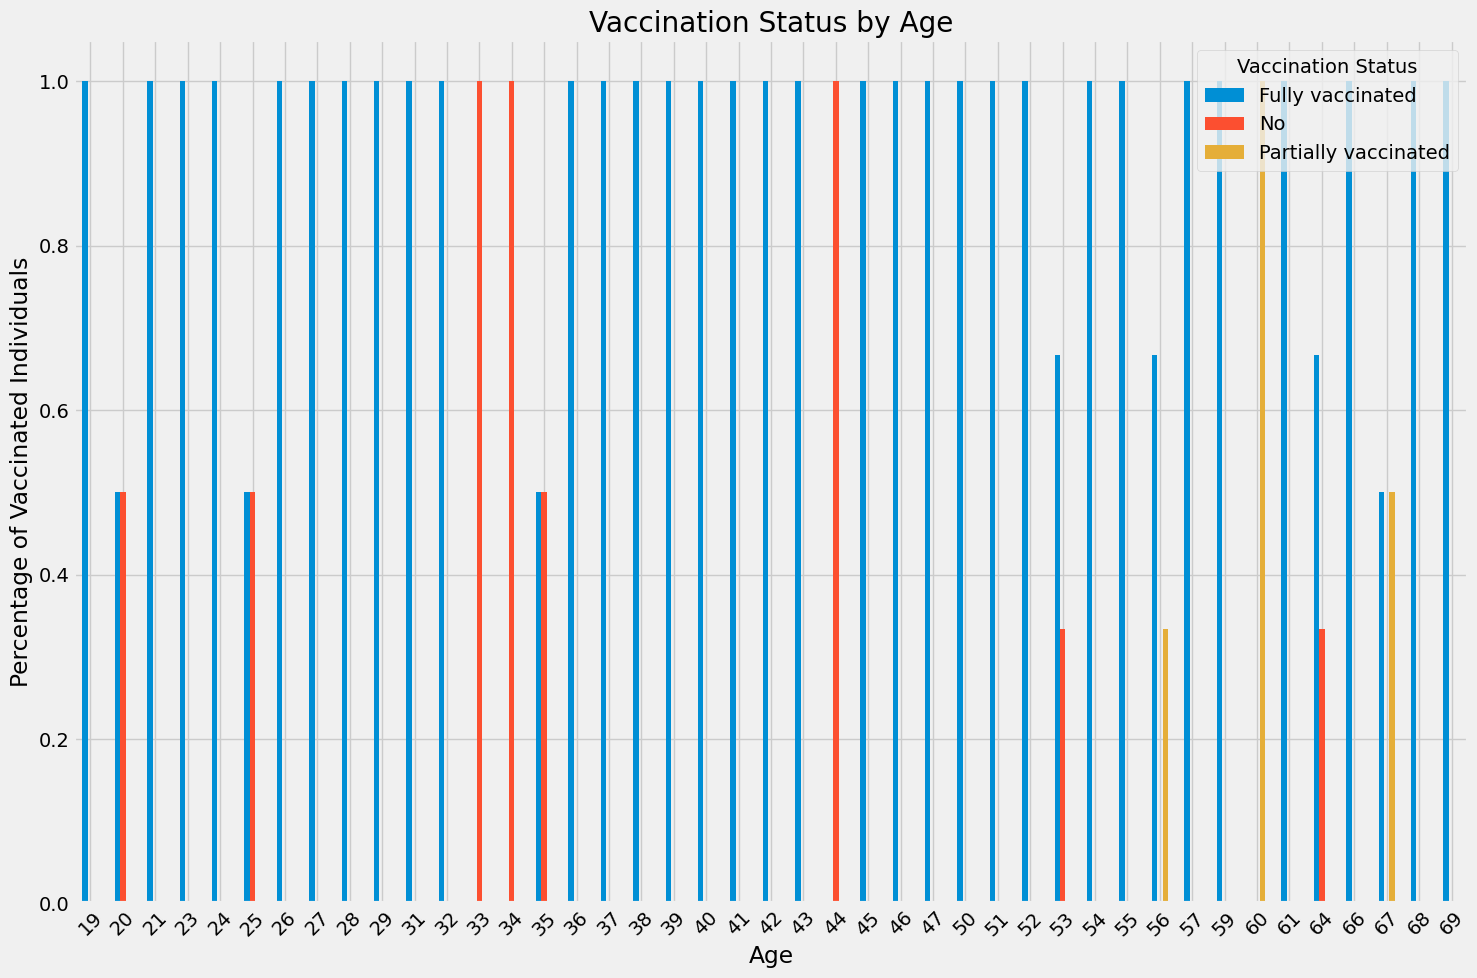

In [52]:
import matplotlib.pyplot as plt
# Set default figure size
plt.rcParams['figure.figsize'] = (15, 10)
age_vs_vaccination = df.groupby('Age')['Vaccinated'].value_counts(normalize=True).unstack()
plt.style.use('fivethirtyeight')
age_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()


- **High Vaccination Rates:** Many age groups exhibit a high percentage of individuals who are fully vaccinated (e.g., ages 19, 21, 23, 24, 26, 27, 28, 29, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69). This indicates a high acceptance of vaccination among individuals in these age groups.
  
- **Low Vaccination Rates:** Some age groups have lower vaccination rates, with either no individuals vaccinated or only partially vaccinated (e.g., ages 20, 33, 34). This suggests potential areas where vaccination campaigns or outreach efforts may need to be strengthened.

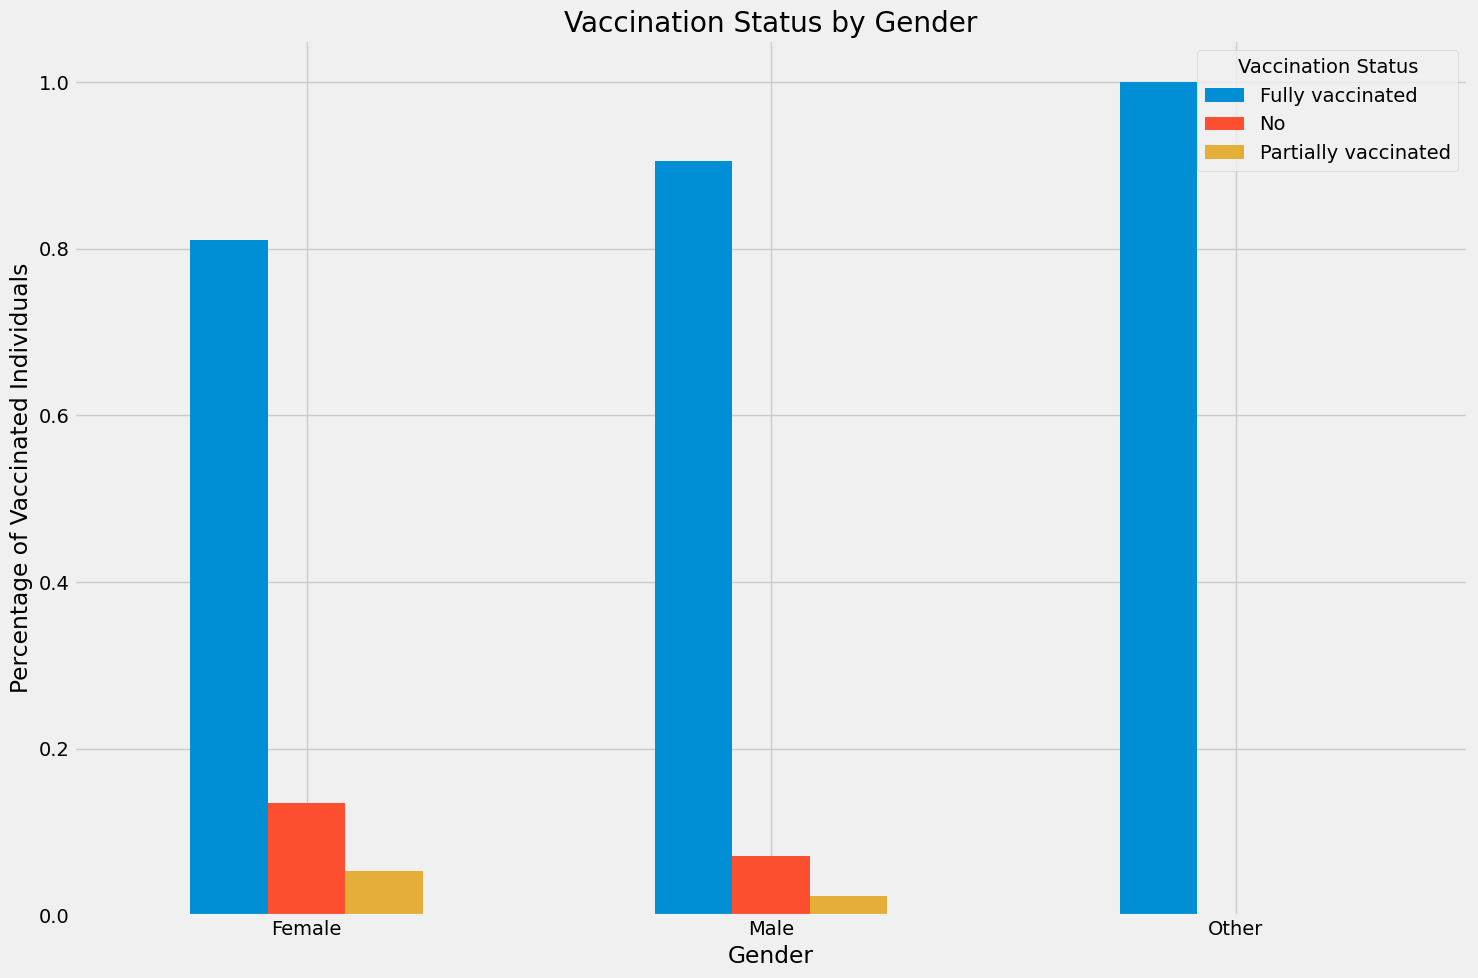

In [53]:
# Gender vs. Vaccination Status
gender_vs_vaccination = df.groupby('Gender')['Vaccinated'].value_counts(normalize=True).unstack()
gender_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=0)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Gender**:
  - **Female**:
    - 81.08% of females are fully vaccinated.
    - 13.51% of females have not been vaccinated.
    - 5.41% of females are partially vaccinated.
  - **Male**:
    - 90.48% of males are fully vaccinated.
    - 7.14% of males have not been vaccinated.
    - 2.38% of males are partially vaccinated.
  - **Other**:
    - 100% of individuals with other gender identities are fully vaccinated.
    - There is no data available for individuals with other gender identities who have not been vaccinated or are partially vaccinated.

- **Observations**:
  - Generally, a higher percentage of males are fully vaccinated compared to females.
  - The percentage of individuals with other gender identities who are fully vaccinated is 100%, indicating a complete vaccination rate for this group.
  - There is a relatively lower percentage of individuals who have not been vaccinated or are partially vaccinated among males compared to females.


C:\Users\Aftab Hussain\AppData\Local\Temp\ipykernel_14468\4177232382.py:9: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
C:\Users\Aftab Hussain\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


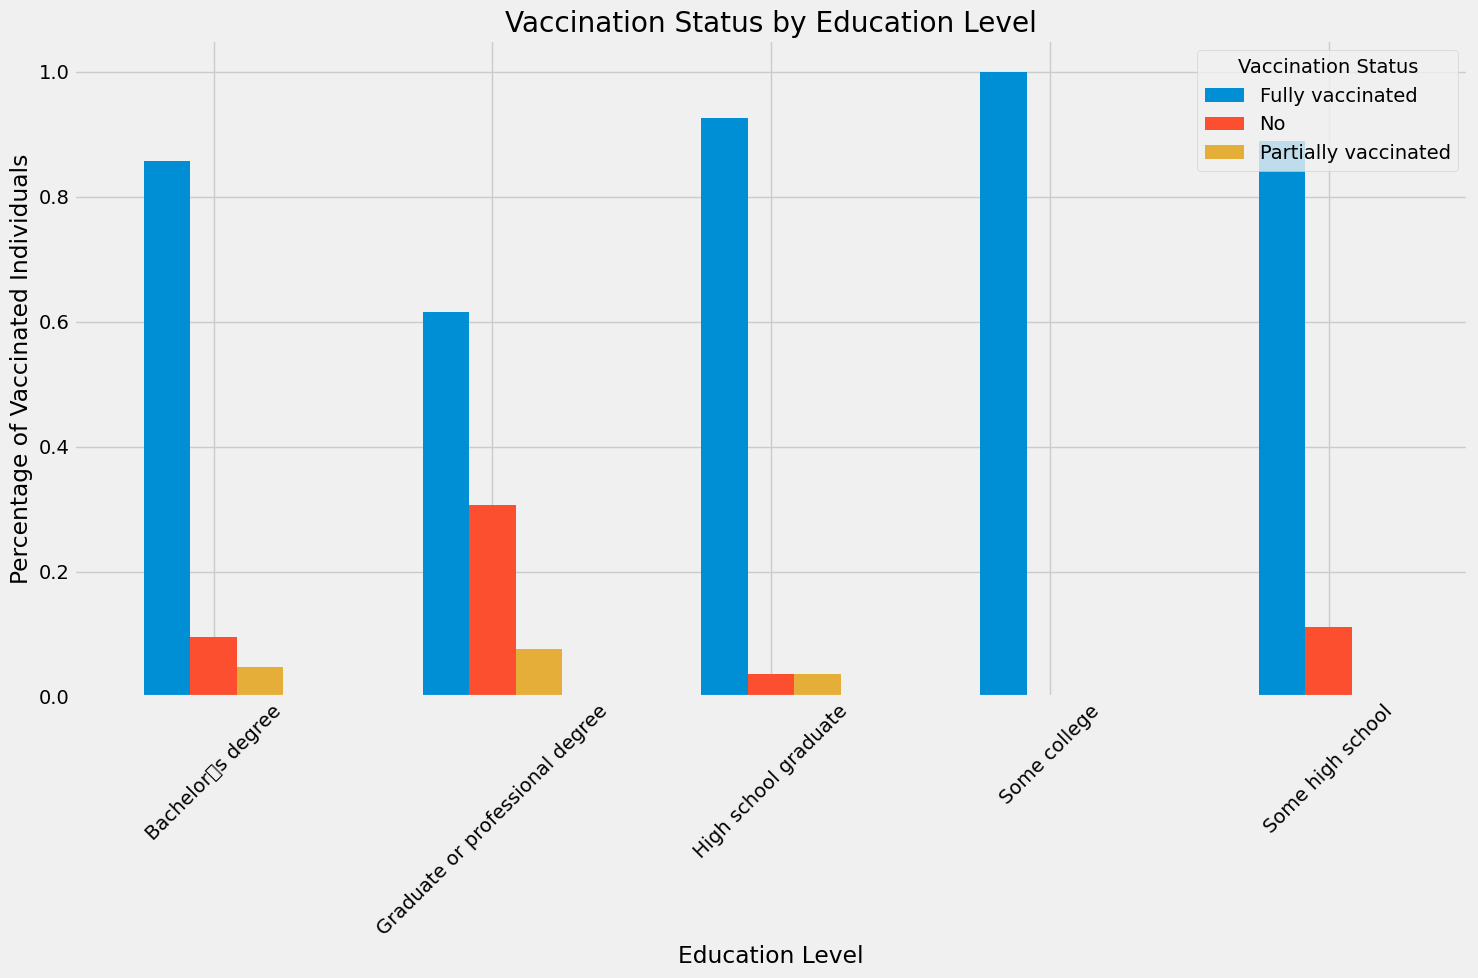

In [54]:
# Education Level vs. Vaccination Status
education_vs_vaccination = df.groupby('Education')['Vaccinated'].value_counts(normalize=True).unstack()
education_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Education**:
  - **Bachelor’s degree**:
    - 85.71% of individuals with a Bachelor’s degree are fully vaccinated.
    - 9.52% have not been vaccinated.
    - 4.76% are partially vaccinated.
  - **Graduate or professional degree**:
    - 61.54% of individuals with a Graduate or professional degree are fully vaccinated.
    - 30.77% have not been vaccinated.
    - 7.69% are partially vaccinated.
  - **High school graduate**:
    - 92.59% of high school graduates are fully vaccinated.
    - 3.70% have not been vaccinated.
    - 3.70% are partially vaccinated.
  - **Some college**:
    - 100% of individuals with some college education are fully vaccinated.
    - There is no data available for individuals with some college education who have not been vaccinated or are partially vaccinated.
  - **Some high school**:
    - 88.89% of individuals with some high school education are fully vaccinated.
    - 11.11% have not been vaccinated.
    - There is no data available for individuals with some high school education who are partially vaccinated.

- **Observations**:
  - Individuals with some college education have a 100% vaccination rate, indicating a high level of vaccination within this group.
  - The percentage of individuals with a Graduate or professional degree who are fully vaccinated is relatively lower compared to other education levels.
  - There is a relatively higher percentage of individuals with a Bachelor’s degree who are fully vaccinated compared to those with a Graduate or professional degree.


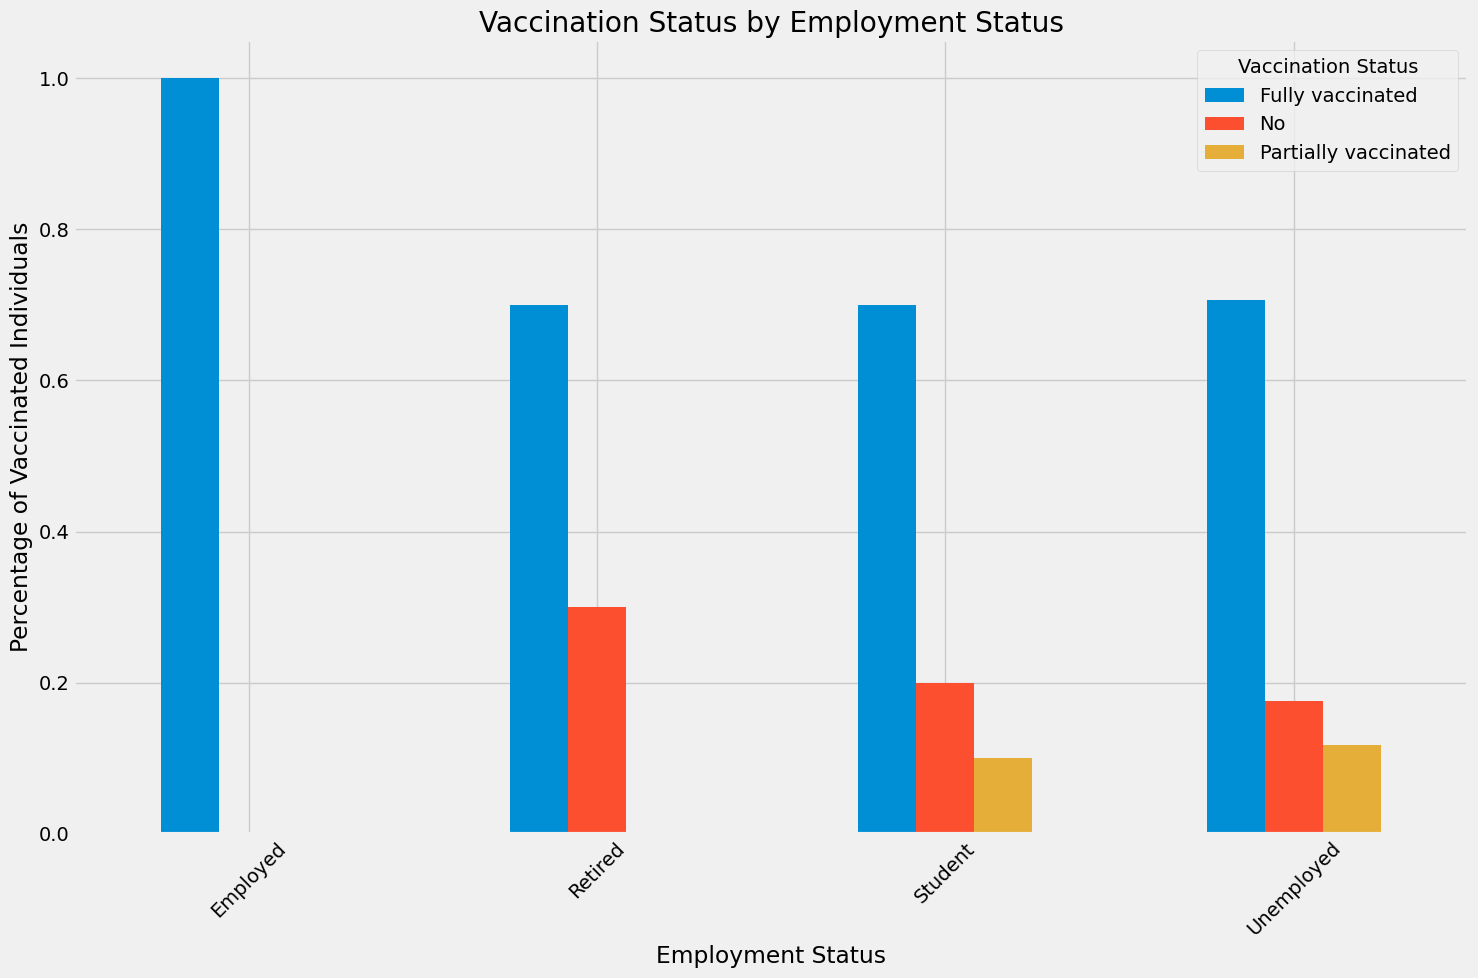

In [55]:
# Employment Status vs. Vaccination Status
employment_vs_vaccination = df.groupby('Employment Status')['Vaccinated'].value_counts(normalize=True).unstack()
employment_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Employment Status**:
  - **Employed**:
    - 100% of employed individuals are fully vaccinated.
    - There is no data available for employed individuals who have not been vaccinated or are partially vaccinated.
  - **Retired**:
    - 70% of retired individuals are fully vaccinated.
    - 30% have not been vaccinated.
    - There is no data available for retired individuals who are partially vaccinated.
  - **Student**:
    - 70% of students are fully vaccinated.
    - 20% have not been vaccinated.
    - 10% are partially vaccinated.
  - **Unemployed**:
    - 70.59% of unemployed individuals are fully vaccinated.
    - 17.65% have not been vaccinated.
    - 11.76% are partially vaccinated.

- **Observations**:
  - Employed individuals have a 100% vaccination rate, indicating a high level of vaccination within this group.
  - Retired individuals have a relatively lower vaccination rate compared to employed individuals.
  - Students and unemployed individuals have similar vaccination rates, with a slight difference in the percentages of individuals who have not been vaccinated or are partially vaccinated.


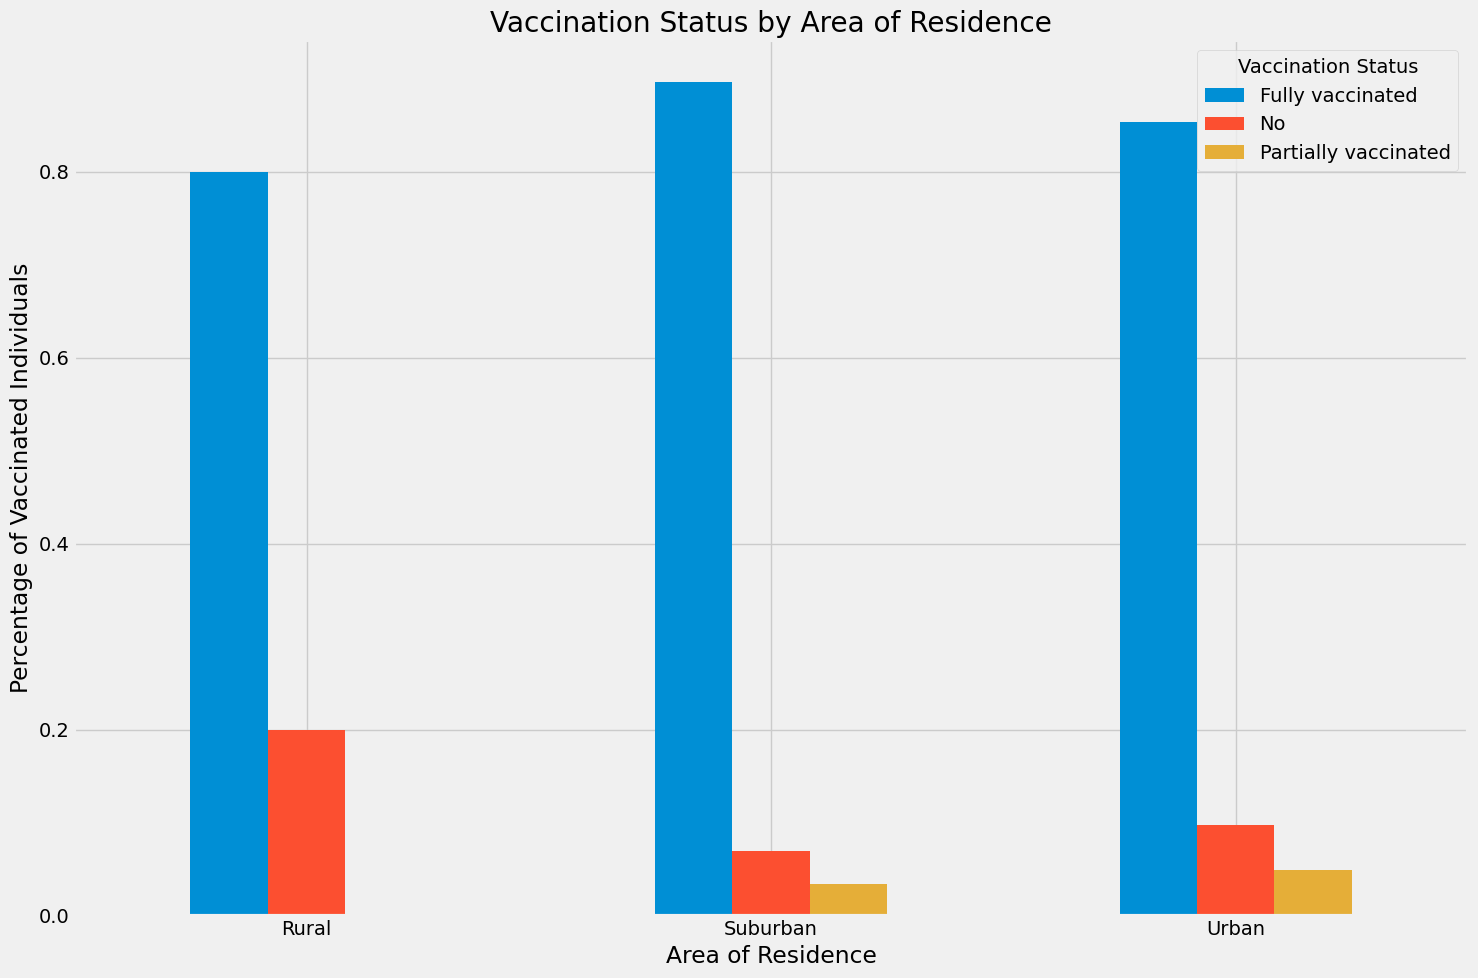

In [56]:
# Area of Residence vs. Vaccination Status
area_vs_vaccination = df.groupby('Area of Residence')['Vaccinated'].value_counts(normalize=True).unstack()
# Area of Residence vs. Vaccination Status
area_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Area of Residence')
plt.xlabel('Area of Residence')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=0)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()


- **Vaccination Rates by Area of Residence**:
  - **Rural**:
    - 80% of individuals residing in rural areas are fully vaccinated.
    - 20% have not been vaccinated.
    - There is no data available for individuals residing in rural areas who are partially vaccinated.
  - **Suburban**:
    - 89.66% of individuals residing in suburban areas are fully vaccinated.
    - 6.90% have not been vaccinated.
    - 3.45% are partially vaccinated.
  - **Urban**:
    - 85.37% of individuals residing in urban areas are fully vaccinated.
    - 9.76% have not been vaccinated.
    - 4.88% are partially vaccinated.

- **Observations**:
  - Suburban areas have the highest percentage of fully vaccinated individuals among the three residence types.
  - Rural areas have a slightly lower percentage of fully vaccinated individuals compared to suburban and urban areas.
  - Urban areas have a higher percentage of individuals who have not been vaccinated or are partially vaccinated compared to suburban areas.


# 2. **Socioeconomic Factors vs. Vaccination Status:**

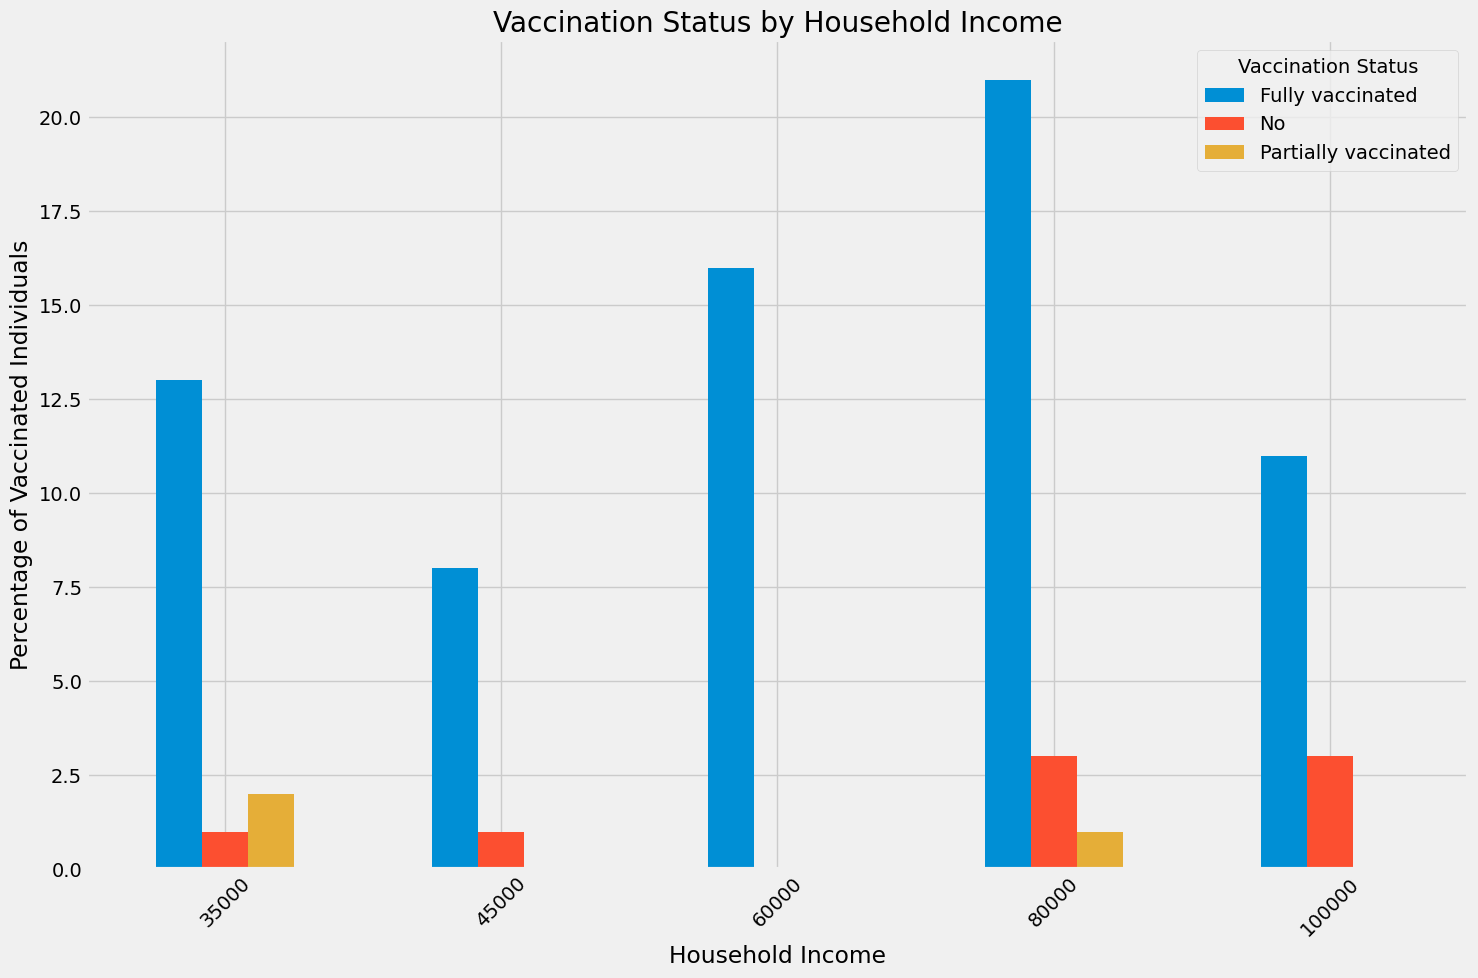

In [57]:
# Household Income vs. Vaccination Status
household_income_vs_vaccination = df.groupby(['Household Income', 'Vaccinated']).size().unstack()
household_income_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Household Income**:
  - **$35,000**:
    - 13 individuals with a household income of $35,000 are fully vaccinated.
    - 1 individual has not been vaccinated.
    - 2 individuals are partially vaccinated.
  - **$45,000**:
    - 8 individuals with a household income of $45,000 are fully vaccinated.
    - 1 individual has not been vaccinated.
    - There is no data available for individuals with a household income of $45,000 who are partially vaccinated.
  - **$60,000**:
    - 16 individuals with a household income of $60,000 are fully vaccinated.
    - There is no data available for individuals with a household income of $60,000 who have not been vaccinated or are partially vaccinated.
  - **$80,000**:
    - 21 individuals with a household income of $80,000 are fully vaccinated.
    - 3 individuals have not been vaccinated.
    - 1 individual is partially vaccinated.
  - **$100,000**:
    - 11 individuals with a household income of $100,000 are fully vaccinated.
    - 3 individuals have not been vaccinated.
    - There is no data available for individuals with a household income of $100,000 who are partially vaccinated.

- **Observations**:
  - Individuals with higher household incomes tend to have higher rates of full vaccination.
  - There is variability in vaccination rates across different income brackets, with some individuals within each income bracket not being fully vaccinated.


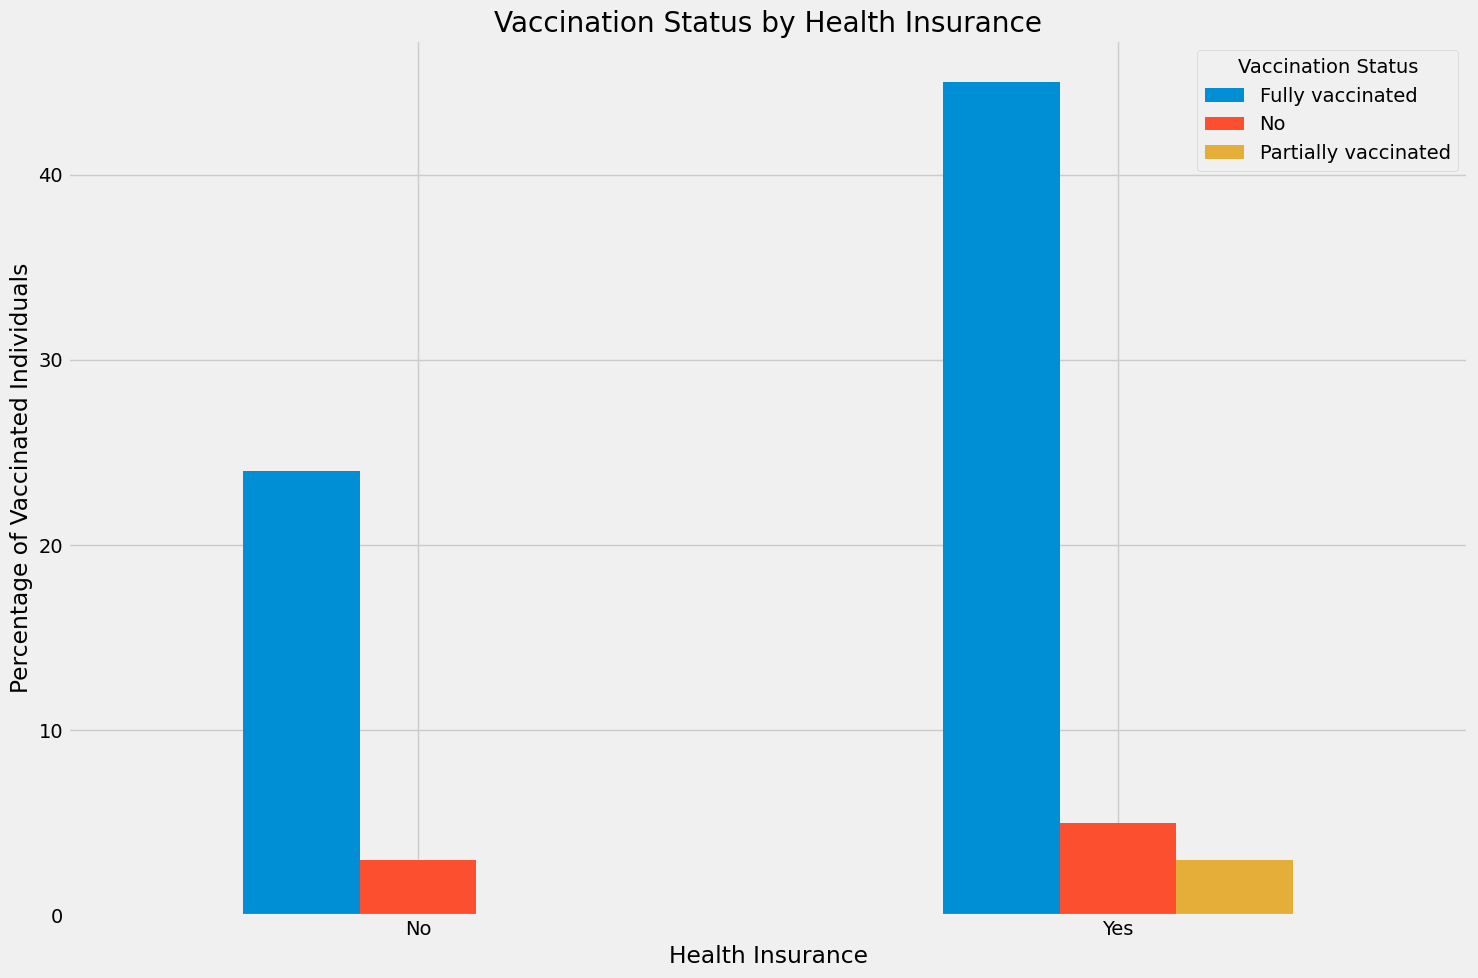

In [58]:
# Health Insurance vs. Vaccination Status
health_insurance_vs_vaccination = df.groupby(['Health Insurance', 'Vaccinated']).size().unstack()
health_insurance_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Health Insurance')
plt.xlabel('Health Insurance')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=0)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Health Insurance**:
  - **No Health Insurance**:
    - 24 individuals without health insurance are fully vaccinated.
    - 3 individuals have not been vaccinated.
    - There is no data available for individuals without health insurance who are partially vaccinated.
  - **With Health Insurance**:
    - 45 individuals with health insurance are fully vaccinated.
    - 5 individuals have not been vaccinated.
    - 3 individuals are partially vaccinated.

- **Observations**:
  - Individuals with health insurance tend to have higher rates of full vaccination compared to those without health insurance.
  - There are individuals in both groups who have not been fully vaccinated, indicating that vaccination rates may be influenced by factors beyond health insurance status.


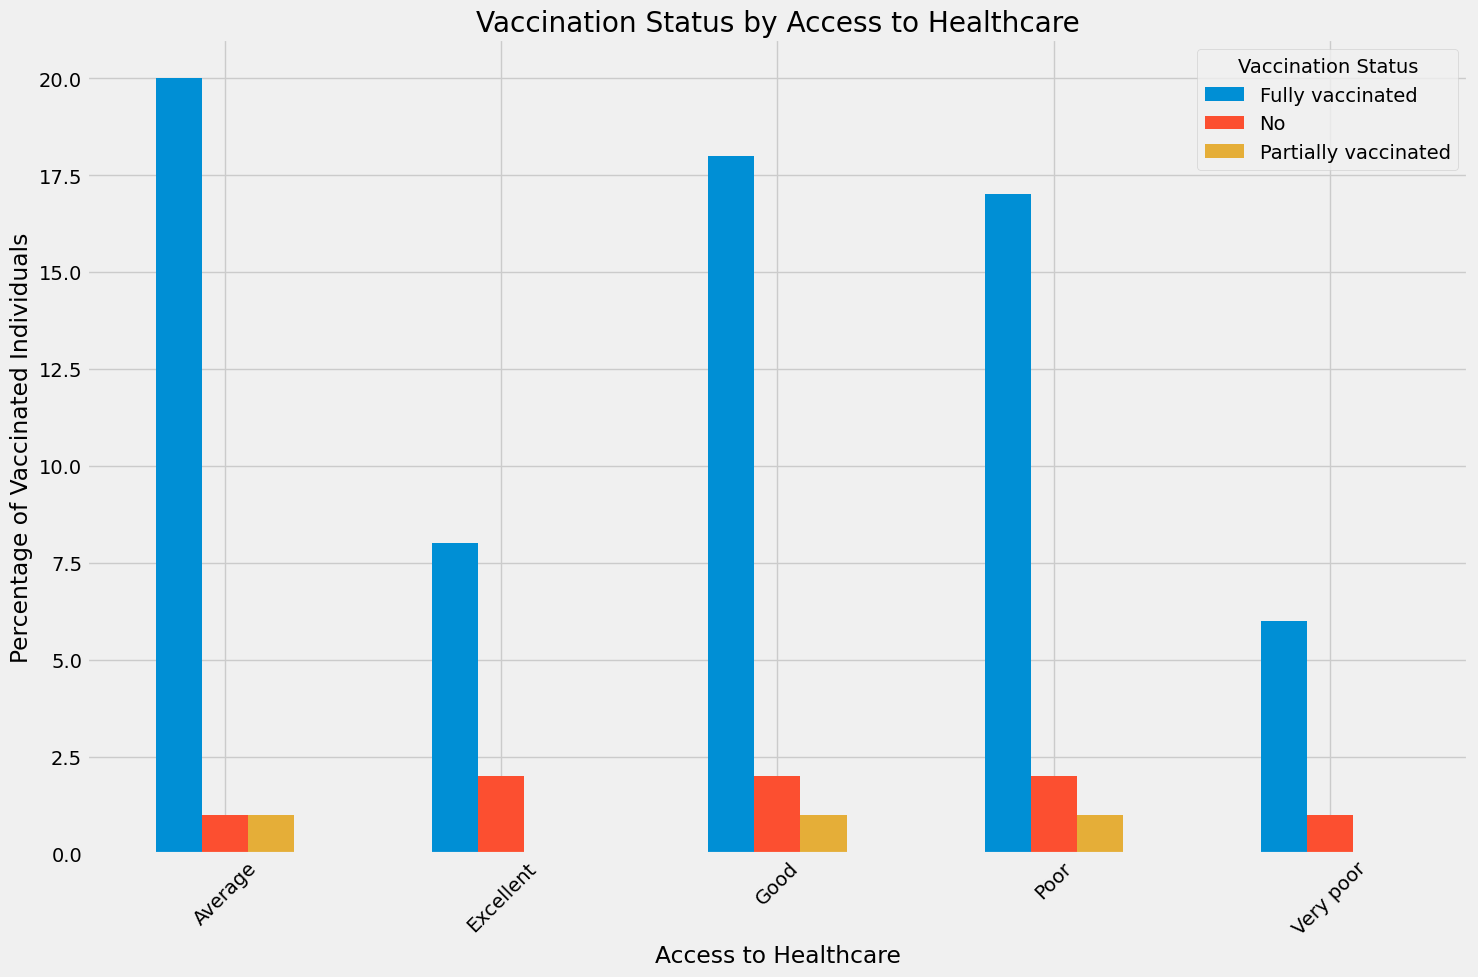

In [59]:
# Access to Healthcare vs. Vaccination Status
access_to_healthcare_vs_vaccination = df.groupby(['Access to Healthcare', 'Vaccinated']).size().unstack()
access_to_healthcare_vs_vaccination.plot(kind='bar')
plt.title('Vaccination Status by Access to Healthcare')
plt.xlabel('Access to Healthcare')
plt.ylabel('Percentage of Vaccinated Individuals')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()

- **Vaccination Rates by Access to Healthcare**:
  - **Average**:
    - 20 individuals with average access to healthcare are fully vaccinated.
    - 1 individual has not been vaccinated.
    - 1 individual is partially vaccinated.
  - **Excellent**:
    - 8 individuals with excellent access to healthcare are fully vaccinated.
    - 2 individuals have not been vaccinated.
    - There is no data available for individuals with excellent access to healthcare who are partially vaccinated.
  - **Good**:
    - 18 individuals with good access to healthcare are fully vaccinated.
    - 2 individuals have not been vaccinated.
    - 1 individual is partially vaccinated.
  - **Poor**:
    - 17 individuals with poor access to healthcare are fully vaccinated.
    - 2 individuals have not been vaccinated.
    - 1 individual is partially vaccinated.
  - **Very poor**:
    - 6 individuals with very poor access to healthcare are fully vaccinated.
    - 1 individual has not been vaccinated.
    - There is no data available for individuals with very poor access to healthcare who are partially vaccinated.

- **Observations**:
  - Individuals with better access to healthcare tend to have higher rates of full vaccination.
  - There is a trend of decreasing vaccination rates as access to healthcare worsens, although there are exceptions within each category.


# 3. **Barriers to Vaccination vs. Demographic and Socioeconomic Factors:**

<Figure size 3000x2000 with 0 Axes>

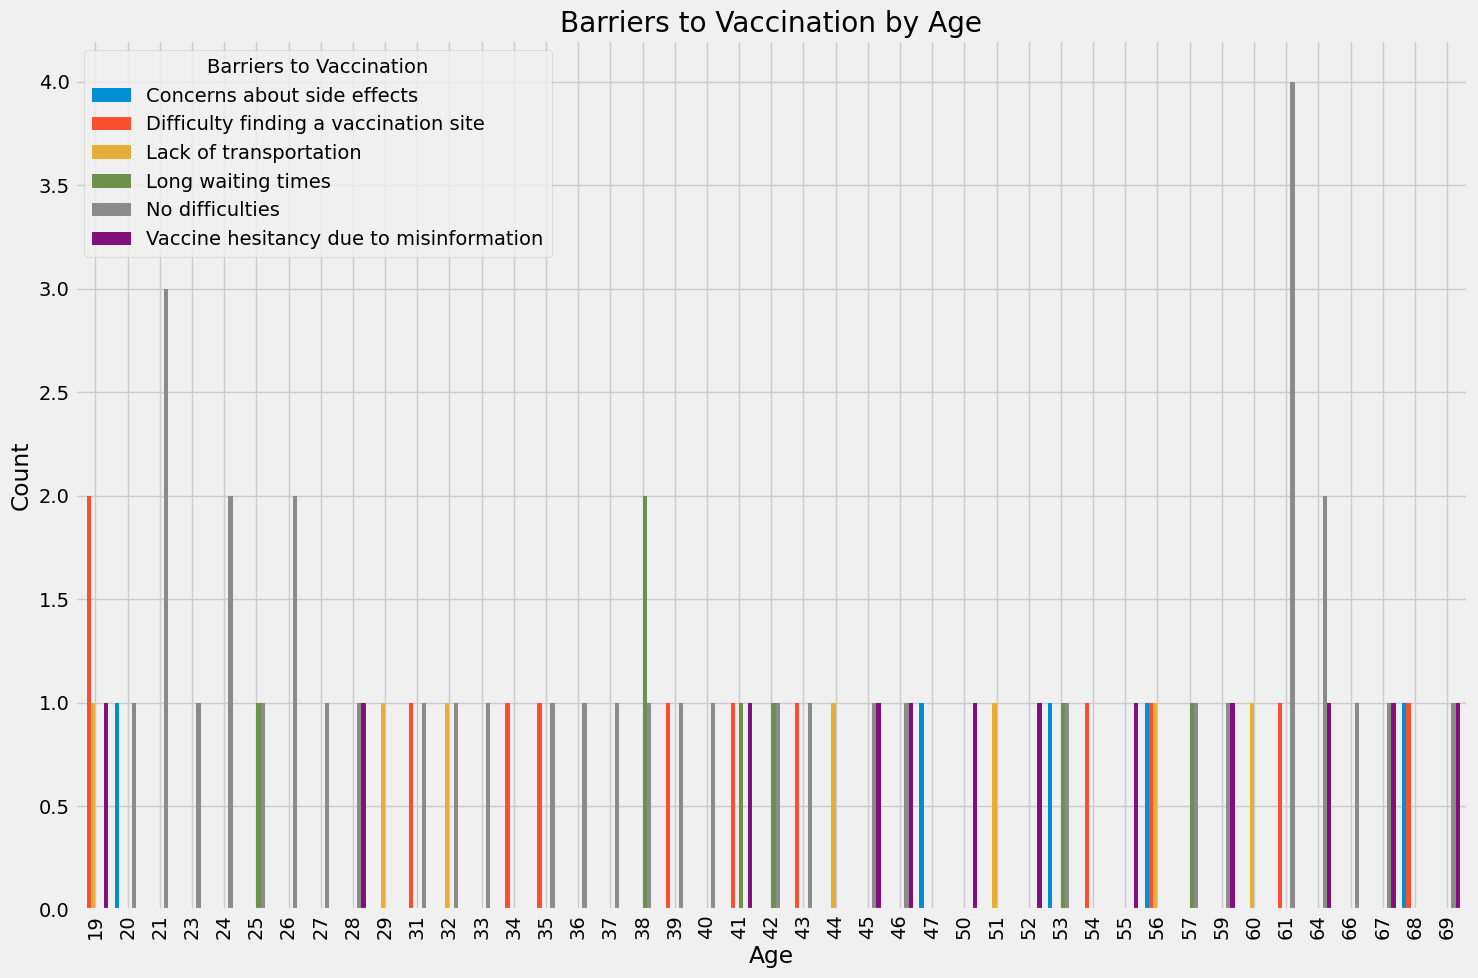

In [60]:
# Age vs. Barriers to Vaccination
plt.figure(figsize=(30, 20))  # Increase the figure size to accommodate all age categories
age_vs_barriers = df.groupby(['Age', 'Barriers to Vaccination']).size().unstack()
age_vs_barriers.plot(kind='bar', stacked=False, width=0.8)
plt.title('Barriers to Vaccination by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels to 90 degrees for better readability
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

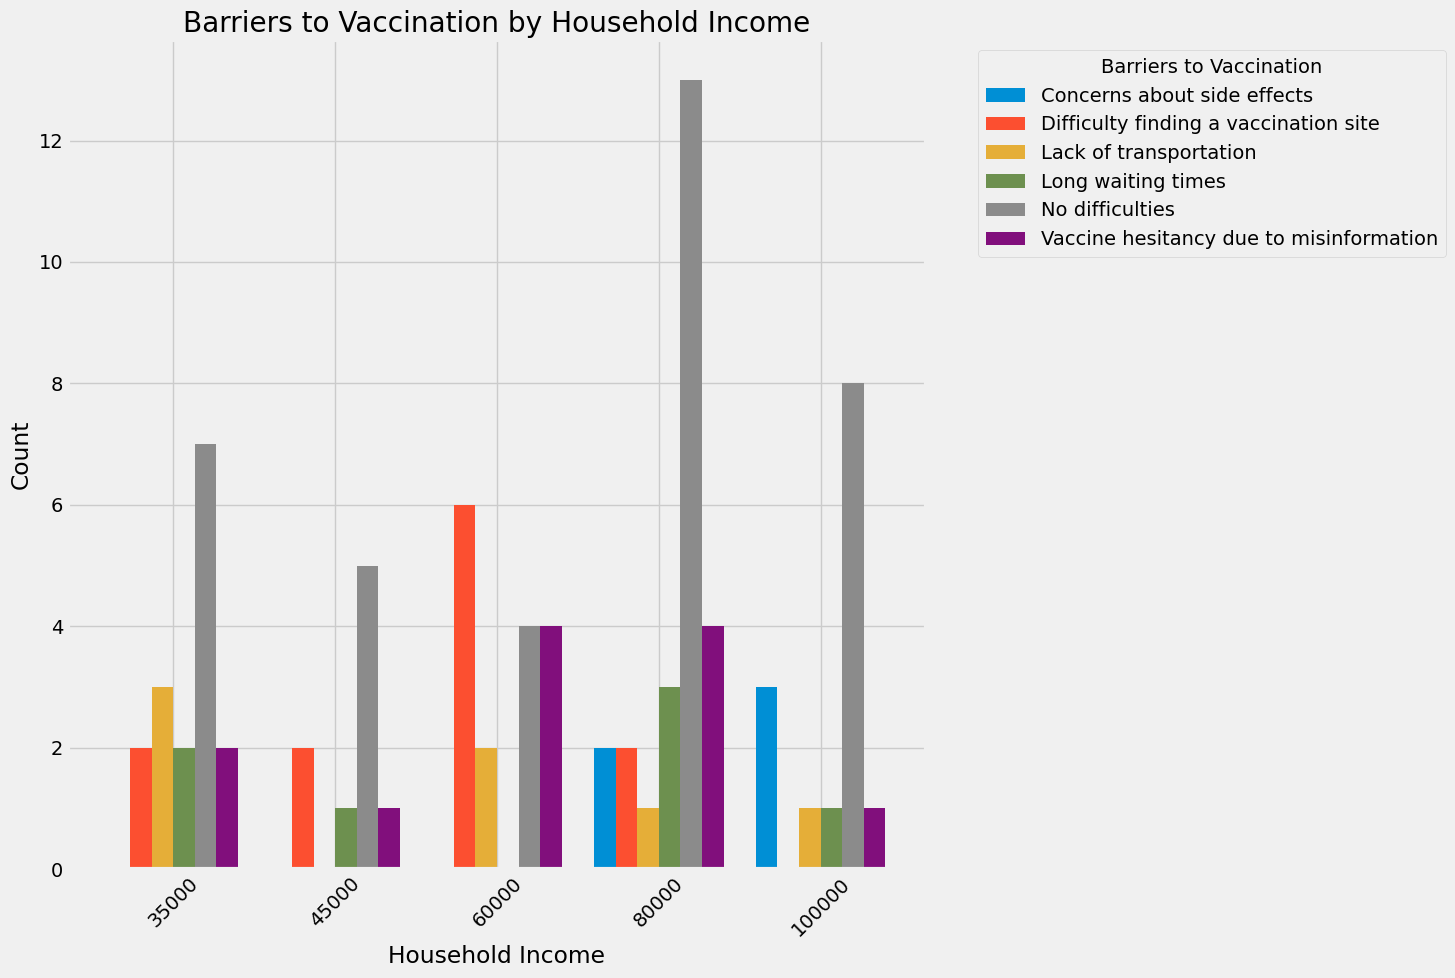

In [61]:
# Income vs. Barriers to Vaccination
plt.figure(figsize=(10, 6))
income_vs_barriers = df.groupby(['Household Income', 'Barriers to Vaccination']).size().unstack()
income_vs_barriers.plot(kind='bar', stacked=False, width=0.8)
plt.title('Barriers to Vaccination by Household Income')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Barriers to Vaccination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Barriers to Vaccination by Household Income**:

| Household Income | Concerns about side effects | Difficulty finding a vaccination site | Lack of transportation | Long waiting times | No difficulties | Total |
|------------------|------------------------------|----------------------------------------|------------------------|--------------------|------------------|-------|
| $35,000          | 0                          | 2.0                                    | 3.0                    | 2.0                | 0              | 7.0   |
| $45,000          | 0                          | 2.0                                    | 0                    | 1.0                | 1.0              | 4.0   |
| $60,000          | 0                          | 6.0                                    | 2.0                    | 0                | 4.0              | 12.0  |
| $80,000          | 2.0                          | 2.0                                    | 1.0                    | 3.0                | 4.0              | 12.0  |
| $100,000         | 3.0                          | 0                                    | 1.0                    | 1.0                | 1.0              | 6.0   |

- **Observations**:
  - Individuals with household incomes of $60,000 and $80,000 face the most barriers to vaccination, including difficulty finding a vaccination site and concerns about side effects.
  - Lack of transportation is a barrier for individuals across various income brackets, although it's more prevalent among those earning $35,000 and $60,000.
  - Long waiting times seem to be a significant concern for individuals earning $80,000, with 3 out of 12 reporting it as a barrier.


<Figure size 1000x600 with 0 Axes>

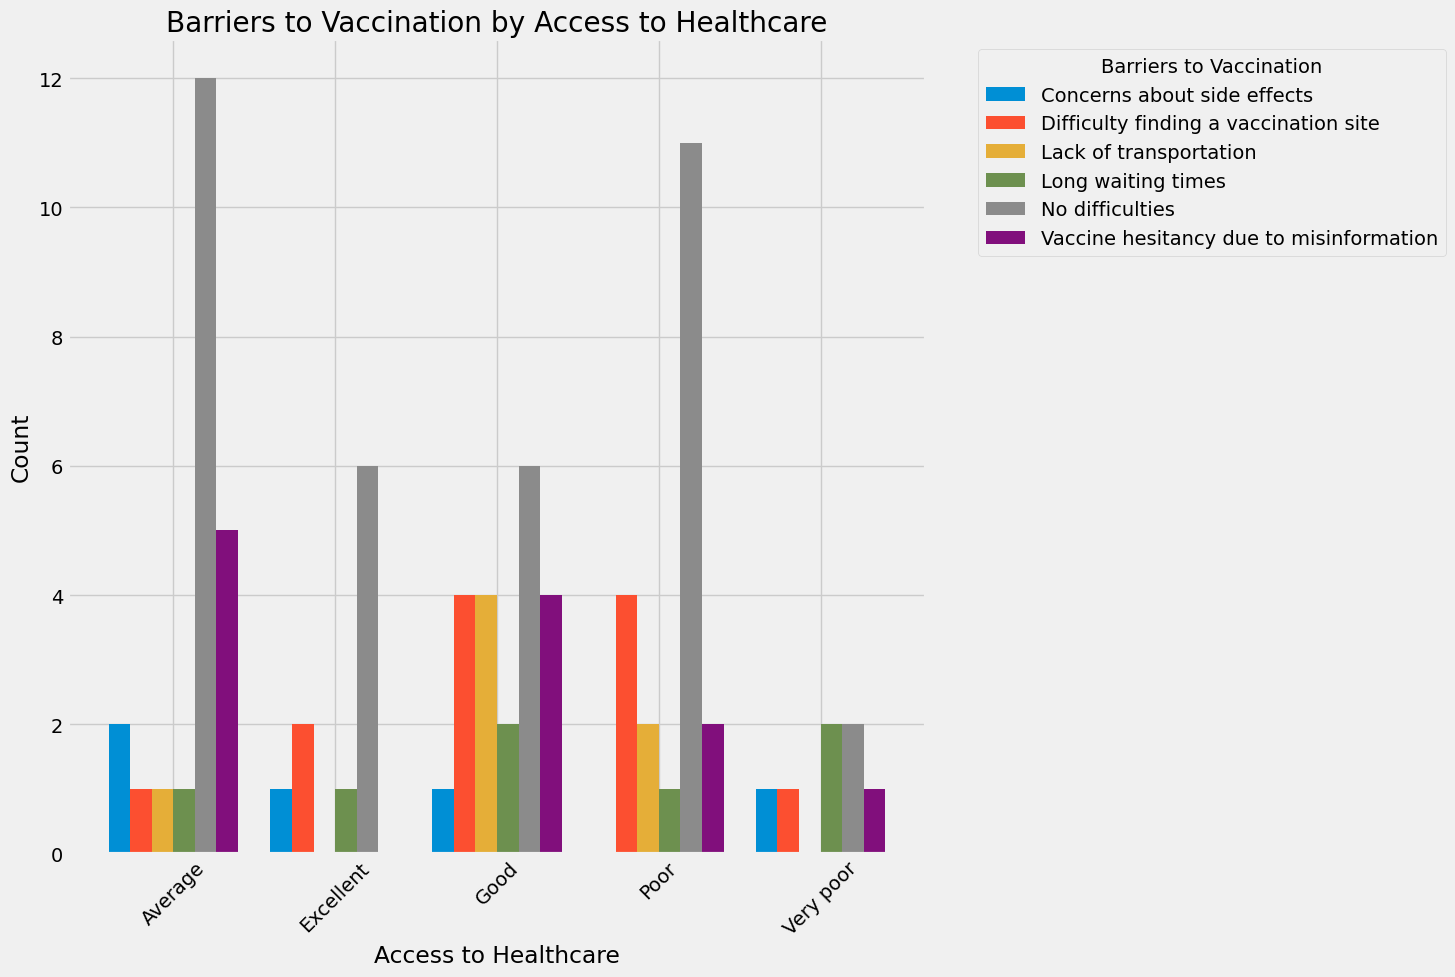

In [62]:
# Access to Healthcare vs. Barriers to Vaccination
plt.figure(figsize=(10, 6))
access_vs_barriers = df.groupby(['Access to Healthcare', 'Barriers to Vaccination']).size().unstack()
access_vs_barriers.plot(kind='bar', stacked=False, width=0.8)
plt.title('Barriers to Vaccination by Access to Healthcare')
plt.xlabel('Access to Healthcare')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Barriers to Vaccination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Barriers to Vaccination by Access to Healthcare**:

| Access to Healthcare | Concerns about side effects | Difficulty finding a vaccination site | Lack of transportation | Long waiting times | No difficulties | Total |
|----------------------|------------------------------|----------------------------------------|------------------------|--------------------|------------------|-------|
| Average              | 2.0                          | 1.0                                    | 1.0                    | 1.0                | 0              | 5.0   |
| Excellent            | 1.0                          | 2.0                                    | 0                    | 1.0                | 0              | 4.0   |
| Good                 | 1.0                          | 4.0                                    | 4.0                    | 2.0                | 0              | 11.0  |
| Poor                 | 0                          | 4.0                                    | 2.0                    | 1.0                | 2.0              | 9.0   |
| Very poor            | 1.0                          | 1.0                                    | 0                    | 2.0                | 1.0              | 5.0   |

- **Observations**:
  - Individuals with good access to healthcare face the most barriers to vaccination, including difficulty finding a vaccination site and lack of transportation.
  - Concerns about side effects seem to be a barrier across various levels of access to healthcare, with similar reported rates for average, excellent, and very poor access categories.
  - Long waiting times are reported as a barrier for individuals with good access to healthcare, with 2 out of 11 individuals experiencing this issue.


# 4. **Reasons for Not Vaccinating vs. Demographic Factors:**

<Figure size 1500x800 with 0 Axes>

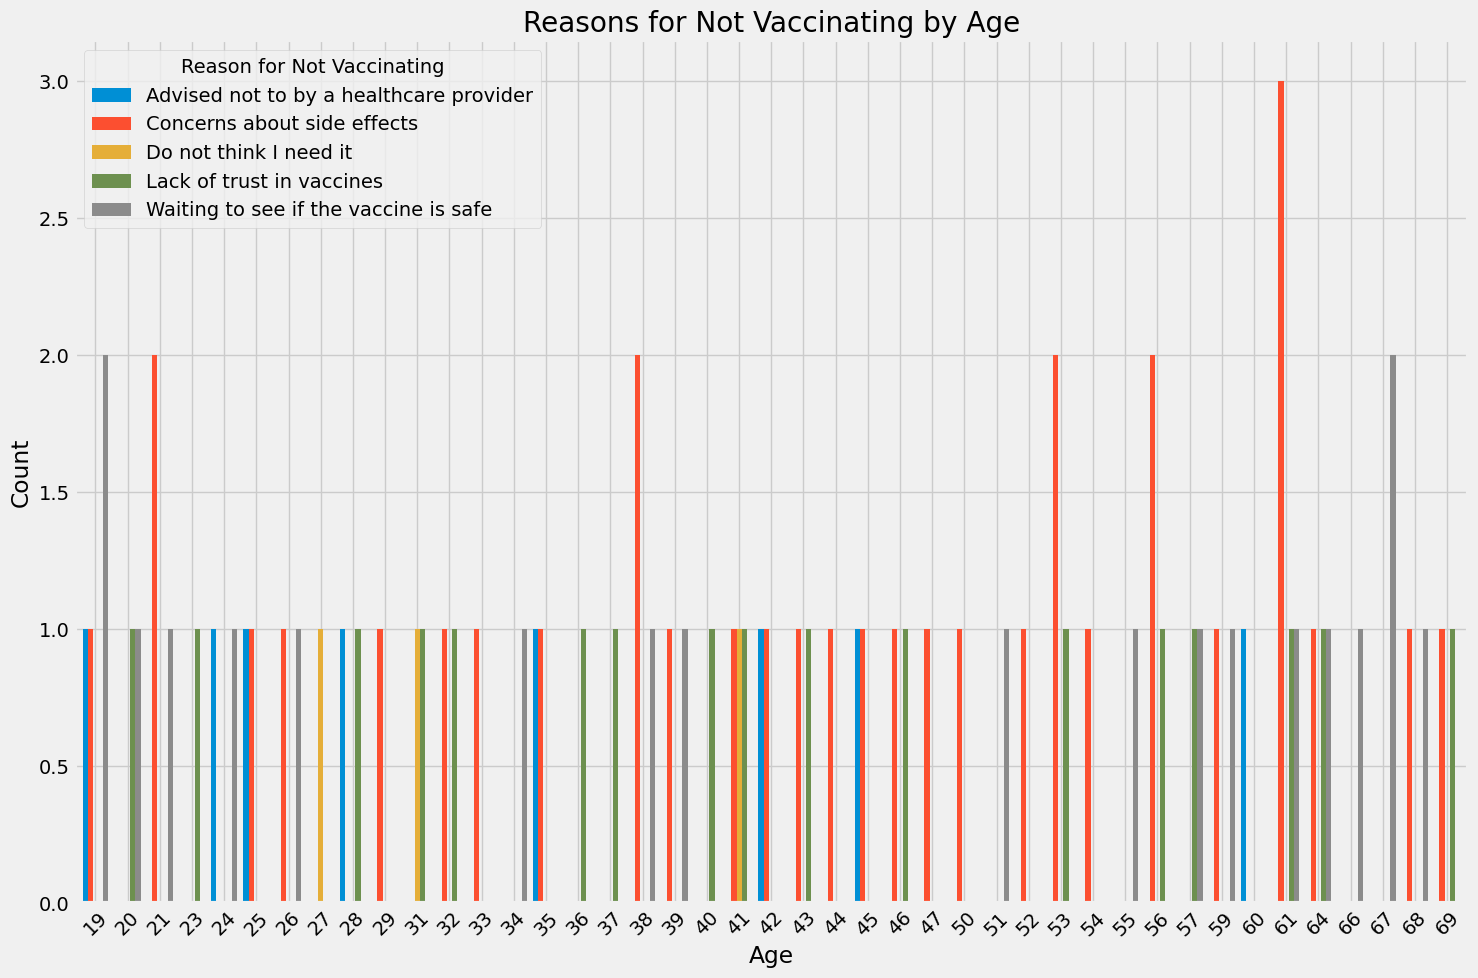

In [63]:
# Age vs. Reasons for Not Vaccinating
plt.figure(figsize=(15, 8))
age_vs_reasons = df.groupby(['Age', 'Reason for Not Vaccinating']).size().unstack()
age_vs_reasons.plot(kind='bar', stacked=False, width=0.8)
plt.title('Reasons for Not Vaccinating by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Among the 61 individuals aged 61, the primary reason for not vaccinating is concerns about side effects.


C:\Users\Aftab Hussain\AppData\Local\Temp\ipykernel_14468\1453723149.py:9: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

C:\Users\Aftab Hussain\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


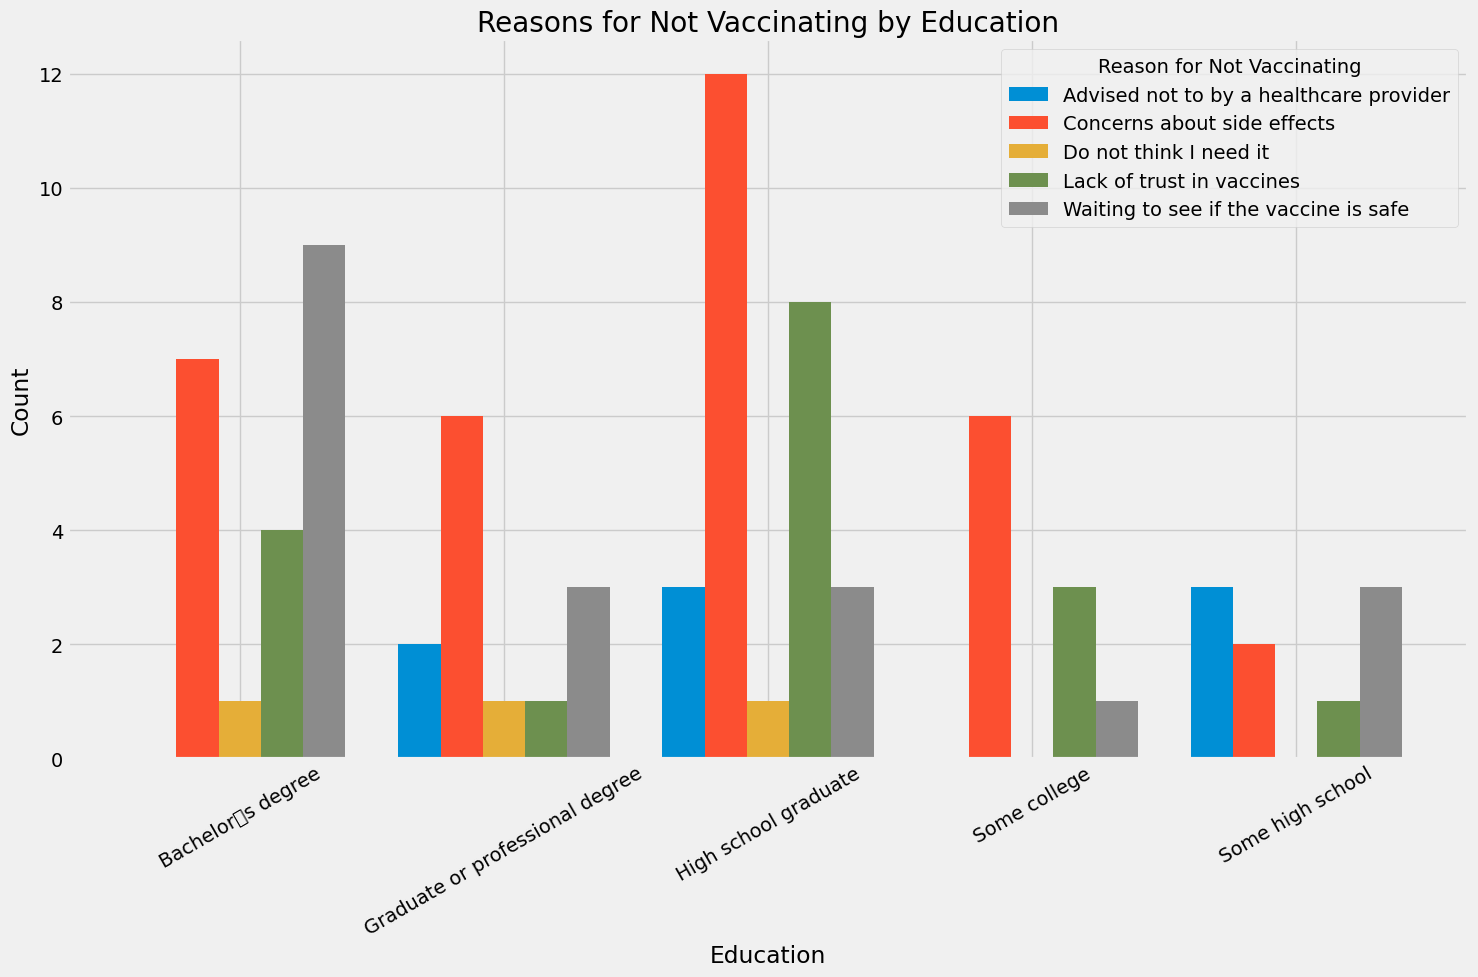

In [64]:
# Education vs. Reasons for Not Vaccinating
plt.figure(figsize=(12, 8))
education_vs_reasons = df.groupby(['Education', 'Reason for Not Vaccinating']).size().unstack()
education_vs_reasons.plot(kind='bar', stacked=False, width=0.8)
plt.title('Reasons for Not Vaccinating by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- **Reasons for Not Vaccinating by Education**:

| Education                   | Advised not to by a healthcare provider | Concerns about side effects | Do not think I need it | Lack of trust in vaccines | Total |
|-----------------------------|-----------------------------------------|-----------------------------|------------------------|----------------------------|-------|
| Bachelor’s degree           | 0                                     | 7.0                         | 1.0                    | 3.0                        | 11.0  |
| Graduate or professional degree | 2.0                                 | 6.0                         | 1.0                    | 3.0                        | 12.0  |
| High school graduate        | 3.0                                     | 12.0                        | 1.0                    | 3.0                        | 19.0  |
| Some college                | 0                                     | 6.0                         | 0                    | 1.0                        | 7.0   |
| Some high school            | 3.0                                     | 2.0                         | 0                    | 3.0                        | 8.0   |

- **Observations**:
  - High school graduates have the highest reported concerns about side effects as a reason for not vaccinating.
  - Lack of trust in vaccines is reported as a reason across various education levels, with similar rates for graduate or professional degree holders and high school graduates.
  - Some college and Bachelor’s degree holders have fewer reported reasons for not vaccinating compared to high school graduates.


<Figure size 1000x800 with 0 Axes>

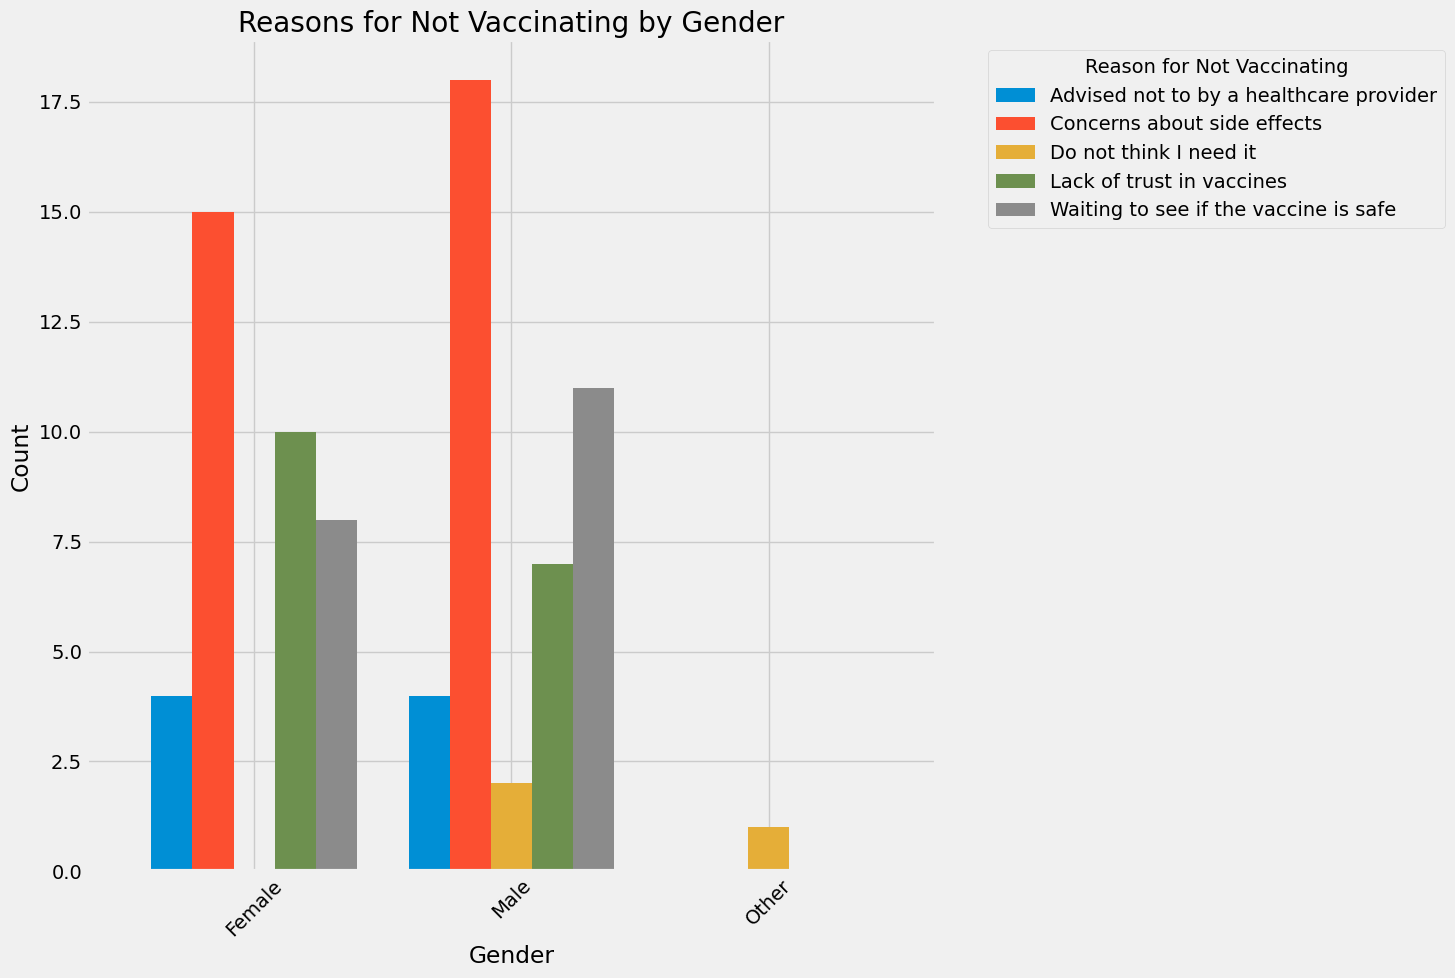

In [65]:
# Gender vs. Reasons for Not Vaccinating
plt.figure(figsize=(10, 8))
gender_vs_reasons = df.groupby(['Gender', 'Reason for Not Vaccinating']).size().unstack()
gender_vs_reasons.plot(kind='bar', stacked=False, width=0.8)
plt.title('Reasons for Not Vaccinating by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reason for Not Vaccinating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Reasons for Not Vaccinating by Gender**:

| Gender | Advised not to by a healthcare provider | Concerns about side effects | Do not think I need it | Lack of trust in vaccines | Waiting to see if the vaccine is safe | Total |
|--------|-----------------------------------------|-----------------------------|------------------------|----------------------------|---------------------------------------|-------|
| Female | 4.0                                     | 15.0                        | 0                    | 10.0                       | 8.0                                   | 37.0  |
| Male   | 4.0                                     | 18.0                        | 2.0                    | 7.0                        | 11.0                                  | 42.0  |
| Other  | 0                                     | 0                         | 1.0                    | 0                        | 0                                   | 1.0   |

- **Observations**:
  - Both females and males report concerns about side effects as the most common reason for not vaccinating.
  - Lack of trust in vaccines is also a significant concern for both genders, with slightly higher reported rates among males.
  - A notable difference is that males report "Waiting to see if the vaccine is safe" as a reason more frequently than females.


# 5. **Information Sources and Trust vs. Vaccination Status:**

<Figure size 1200x800 with 0 Axes>

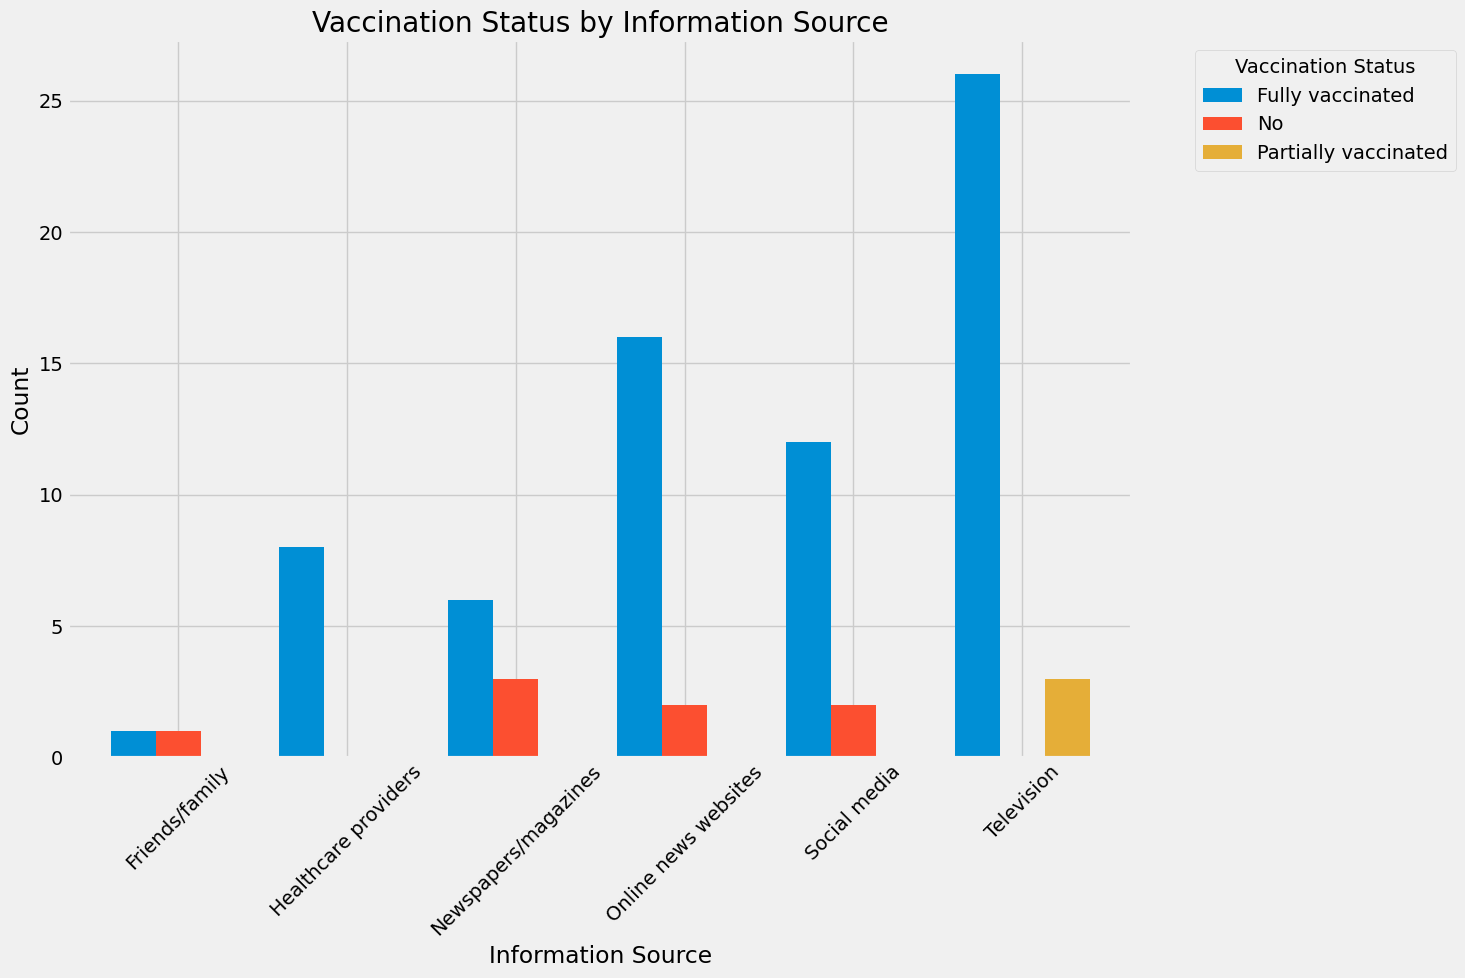

In [66]:
# Information Source vs. Vaccination Status
plt.figure(figsize=(12, 8))
source_vs_vaccination = df.groupby(['Information Source', 'Vaccinated']).size().unstack()
source_vs_vaccination.plot(kind='bar', stacked=False, width=0.8)
plt.title('Vaccination Status by Information Source')
plt.xlabel('Information Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Vaccination Status by Information Source**:

| Information Source       | Fully vaccinated | No  | Partially vaccinated | Total |
|--------------------------|------------------|-----|----------------------|-------|
| Friends/family           | 1.0              | 1.0 | 0                  | 2.0   |
| Healthcare providers     | 8.0              | 0 | 0                  | 8.0   |
| Newspapers/magazines     | 6.0              | 3.0 | 0                  | 9.0   |
| Online news websites     | 16.0             | 2.0 | 0                  | 18.0  |
| Social media             | 12.0             | 2.0 | 0                  | 14.0  |
| Television               | 26.0             | 0 | 3.0                  | 29.0  |

- **Observations**:
  - Television appears to be the most influential information source, with the highest number of individuals being fully vaccinated.
  - Healthcare providers also play a significant role in vaccination, with a considerable number of individuals reporting being fully vaccinated based on their advice.
  - Individuals obtaining information from newspapers/magazines and social media seem to have relatively lower rates of vaccination.


<Figure size 1000x800 with 0 Axes>

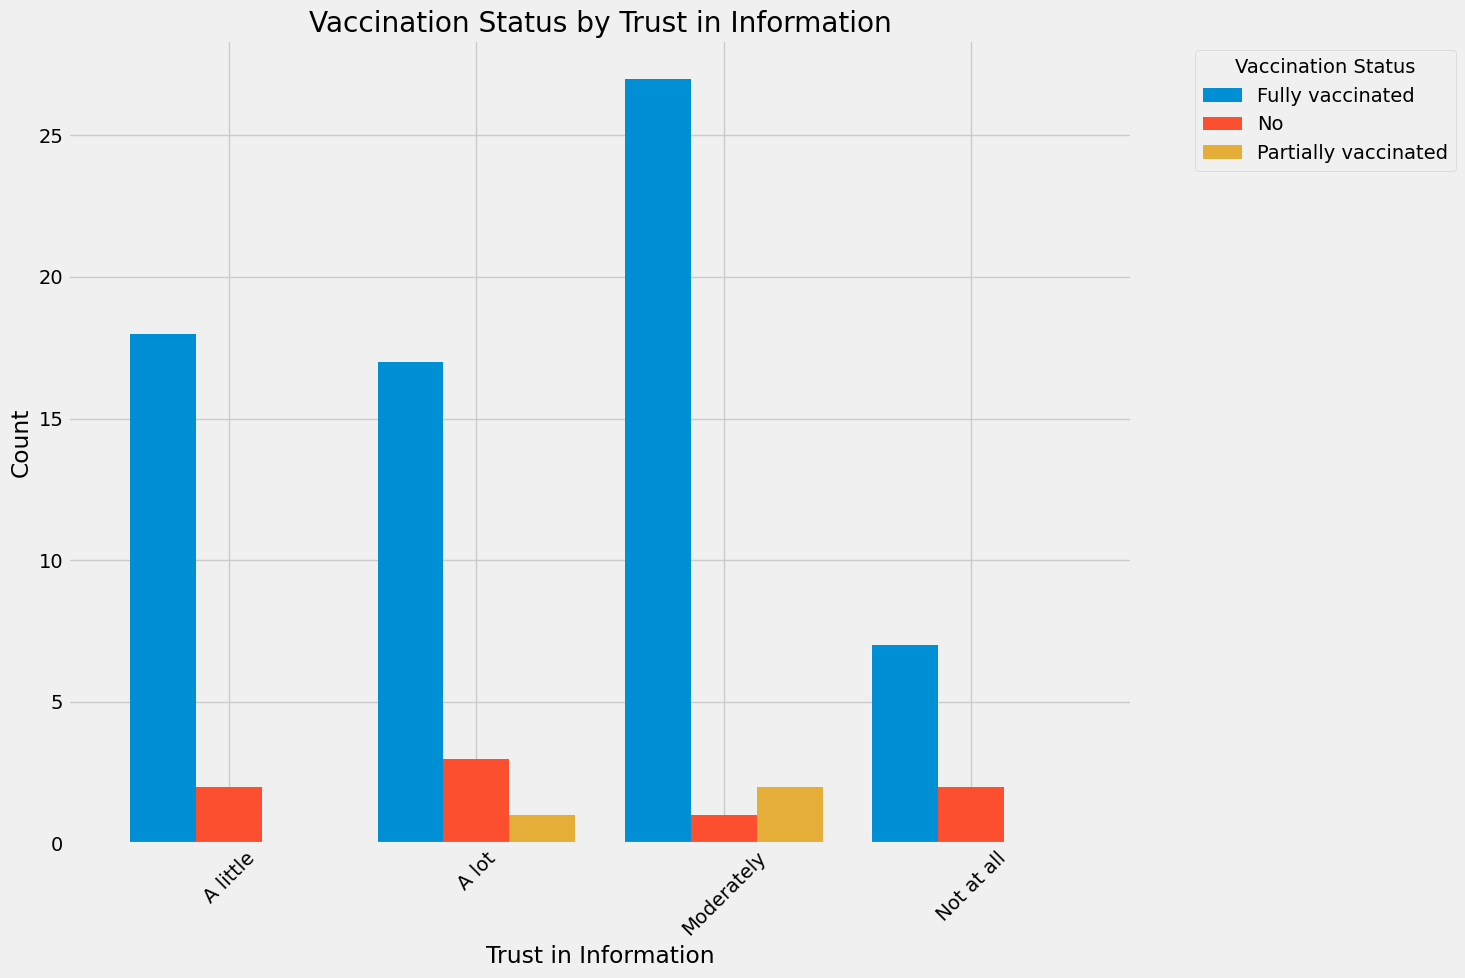

In [67]:
# Trust in Information vs. Vaccination Status
plt.figure(figsize=(10, 8))
trust_vs_vaccination = df.groupby(['Trust in Information', 'Vaccinated']).size().unstack()
trust_vs_vaccination.plot(kind='bar', stacked=False, width=0.8)
plt.title('Vaccination Status by Trust in Information')
plt.xlabel('Trust in Information')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Vaccination Status by Trust in Information**:

| Trust in Information | Fully vaccinated | No  | Partially vaccinated | Total |
|----------------------|------------------|-----|----------------------|-------|
| A little             | 18.0             | 2.0 | 0                  | 20.0  |
| A lot                | 17.0             | 3.0 | 1.0                  | 21.0  |
| Moderately           | 27.0             | 1.0 | 2.0                  | 30.0  |
| Not at all           | 7.0              | 2.0 | 0                  | 9.0   |

- **Observations**:
  - Individuals who trust the information "Moderately" have the highest number of fully vaccinated individuals.
  - Those who trust the information "A lot" also have a significant number of fully vaccinated individuals, although with slightly lower rates compared to those who trust it "Moderately".
  - Individuals who trust the information "A little" have a relatively lower number of fully vaccinated individuals compared to the other trust levels.
  - There is a small number of individuals who do not trust the information at all, with varying vaccination statuses.


# 6. **Perception of Vaccine Benefits vs. Vaccination Status:**

<Figure size 1000x800 with 0 Axes>

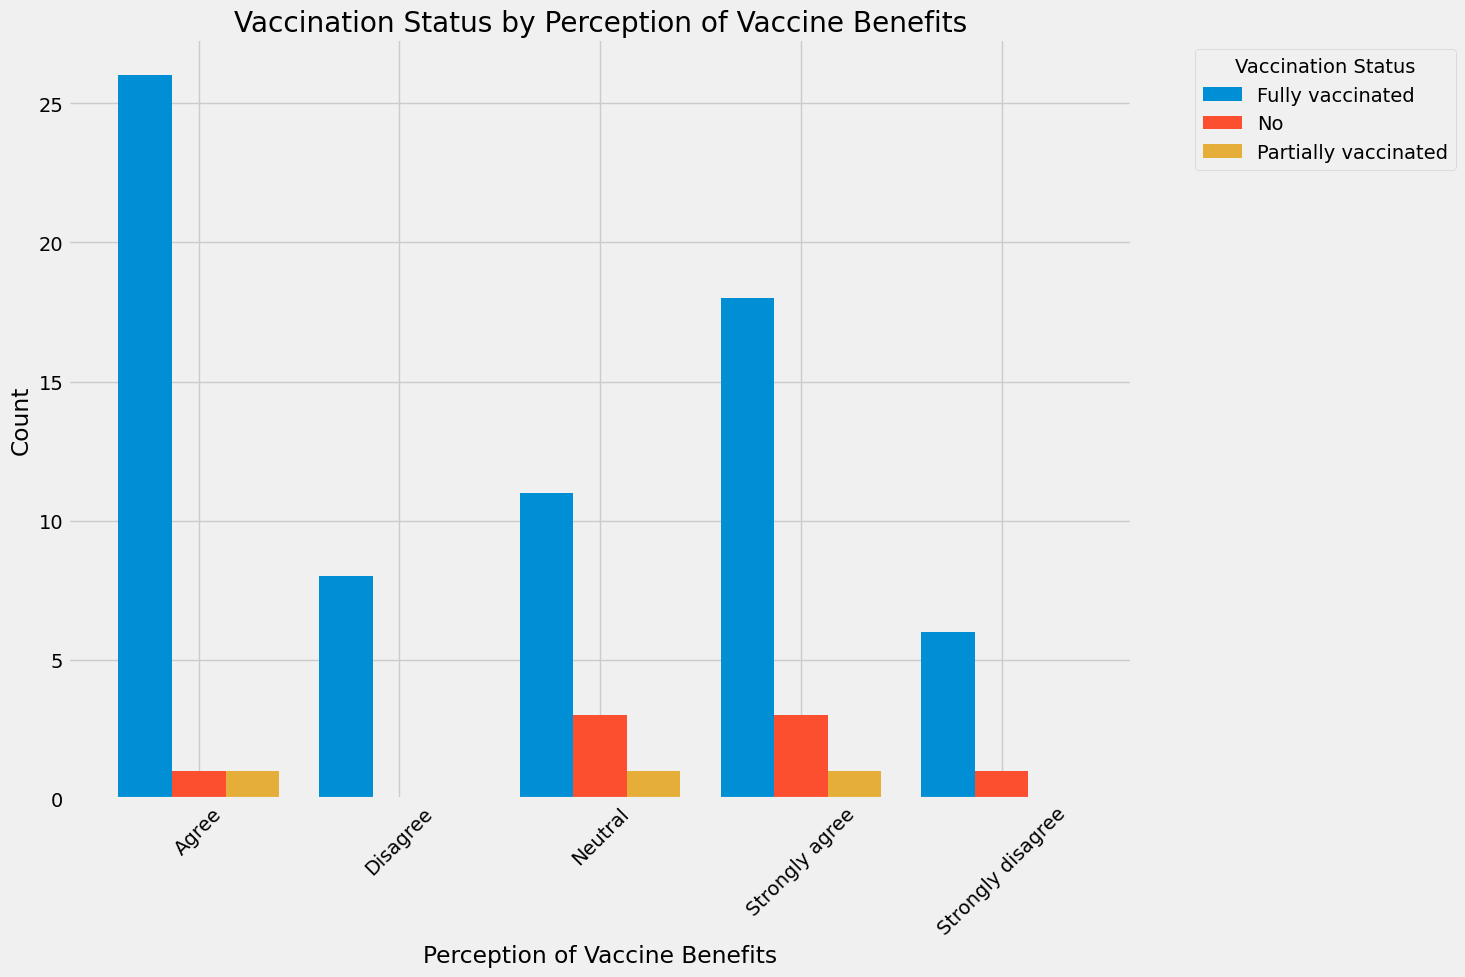

In [68]:
# Perception of Vaccine Benefits vs. Vaccination Status
plt.figure(figsize=(10, 8))
benefits_vs_vaccination = df.groupby(['Perception of Vaccine Benefits', 'Vaccinated']).size().unstack()
benefits_vs_vaccination.plot(kind='bar', stacked=False, width=0.8)
plt.title('Vaccination Status by Perception of Vaccine Benefits')
plt.xlabel('Perception of Vaccine Benefits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Vaccination Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- **Vaccination Status by Perception of Vaccine Benefits**:

| Perception of Vaccine Benefits | Fully vaccinated | No  | Partially vaccinated | Total |
|--------------------------------|------------------|-----|----------------------|-------|
| Agree                          | 26.0             | 1.0 | 1.0                  | 28.0  |
| Disagree                       | 8.0              | 0 | 0                  | 8.0   |
| Neutral                        | 11.0             | 3.0 | 1.0                  | 15.0  |
| Strongly agree                 | 18.0             | 3.0 | 1.0                  | 22.0  |
| Strongly disagree              | 6.0              | 1.0 | 0                  | 7.0   |

- **Observations**:
  - Individuals who agree with the perception of vaccine benefits have the highest number of fully vaccinated individuals.
  - Those who strongly agree with the perception also have a significant number of fully vaccinated individuals, although with slightly lower rates compared to those who agree.
  - Individuals who disagree or strongly disagree with the perception have lower rates of vaccination.
  - Individuals with a neutral perception have varying vaccination statuses, with a relatively lower number of fully vaccinated individuals.


# MACHINE LEARNING ALGORITHM

### Feature Engineering

Performing feature engineering involves transforming categorical variables into numerical representations to facilitate data analysis and modeling. This process includes mapping categorical values to numeric codes, enabling better understanding and utilization of the data for predictive modeling tasks.

In [69]:
# Mapping gender values to numeric 
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df['Gender'] = df['Gender'].map(gender_mapping)

# Mapping employment status values to numeric
employment_mapping = {'Unemployed': 0, 'Employed': 1, 'Student': 2, 'Retired': 3}
df['Employment Status'] = df['Employment Status'].map(employment_mapping)

# Mapping education level values to numeric 
education_mapping = {
    'Some high school': 0,
    'High school graduate': 1,
    'Some college': 2,
    "Bachelor’s degree": 3,
    'Graduate or professional degree': 4
}
df['Education'] = df['Education'].map(education_mapping)

# Fill missing values with 3
df['Education'] = df['Education'].fillna(3)

# Convert area of residence values to numeric
residence_mapping = {'Urban': 0, 'Suburban': 1, 'Rural': 2}
df['Area of Residence'] = df['Area of Residence'].map(residence_mapping)

# Convert health insurance values to numeric
insurance_mapping = {'No': 0, 'Yes': 1}
df['Health Insurance'] = df['Health Insurance'].map(insurance_mapping)

# Mapping access to health care values to numeric 
access_mapping = {
    'Very poor': 0,
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}
df['Access to Healthcare'] = df['Access to Healthcare'].map(access_mapping)

# Convert vaccination status values to numeric
vaccination_mapping = {
    'No': 0,
    'Partially vaccinated': 1,
    'Fully vaccinated': 2
}
df['Vaccinated'] = df['Vaccinated'].map(vaccination_mapping)

In [70]:
df.head()

,Age,Gender,Education,Employment Status,Area of Residence,Household Income,Health Insurance,Access to Healthcare,Vaccinated,Barriers to Vaccination,Reason for Not Vaccinating,Information Source,Trust in Information,Perception of Vaccine Benefits
0,56,0,4.0,0,0,35000,1,3,1,Lack of transportation,Concerns about side effects,Television,Moderately,Neutral
1,69,0,1.0,1,1,45000,1,4,2,No difficulties,Concerns about side effects,Television,A lot,Disagree
2,46,1,2.0,1,1,80000,1,3,2,No difficulties,Concerns about side effects,Television,A little,Neutral
3,32,1,3.0,0,0,35000,1,1,2,Lack of transportation,Lack of trust in vaccines,Healthcare providers,Moderately,Disagree
4,60,1,1.0,0,1,80000,1,2,1,Lack of transportation,Advised not to by a healthcare provider,Television,A lot,Agree


### Load  ML Libraries

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import seaborn as sns

### Model Evaluation

In [72]:
# Select columns
X = df[['Age', 'Gender', 'Education', 'Employment Status', 'Area of Residence', 'Household Income', 'Health Insurance', 'Access to Healthcare']]
y = df['Vaccinated']

In [73]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_test.shape

(16, 8)

In [75]:
X_train.shape

(64, 8)

In [76]:
# Initialize logistic regression model
model = LogisticRegression()

In [77]:
X_train.head()

,Age,Gender,Education,Employment Status,Area of Residence,Household Income,Health Insurance,Access to Healthcare
73,46,0,3.0,1,2,80000,1,2
61,64,0,1.0,1,1,80000,1,2
55,37,1,1.0,1,1,35000,1,1
40,20,0,3.0,1,0,80000,1,4
9,40,1,1.0,1,1,100000,1,3


In [78]:
# Fit the model
model.fit(X_train, y_train)

c:\Users\Aftab Hussain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Model In order to determine the link between the independent variables and the binary result, training for logistic regression entails fitting a regression model to the training set of data. Using a technique known as maximum likelihood estimation, the model determines the coefficients of the independent variables during training. The goal of this procedure is to identify the coefficients that, given the model, maximize the likelihood of observing the training data. An iterative optimization approach, like gradient descent, is used to train the logistic regression model in order to reduce the error between the predicted probabilities and the actual binary outcomes. To reduce overfitting and enhance the model's generalization capabilities, regularization approaches like L1 or L2 regularization can be used. 

In [79]:
# Predict on the test set
y_pred = model.predict(X_test)

In [80]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8125


In [81]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.81      1.00      0.90        13

    accuracy                           0.81        16
   macro avg       0.27      0.33      0.30        16
weighted avg       0.66      0.81      0.73        16



c:\Users\Aftab Hussain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aftab Hussain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aftab Hussain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0   | 0.00      | 0.00   | 0.00     | 1       |
| Class 1   | 0.00      | 0.00   | 0.00     | 2       |
| Class 2   | 0.81      | 1.00   | 0.90     | 13      |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        | 0.81     | 16      |
|-----------|-----------|--------|----------|---------|
| Macro Avg | 0.27      | 0.33   | 0.30     | 16      |
| Weighted Avg | 0.66   | 0.81   | 0.73     | 16      |


- The classification report provides a comprehensive assessment of the model's performance across different classes. While the precision and recall for Class 0 and Class 1 are low, indicating that the model struggles to correctly identify instances of these classes, it performs well for Class 2 with high precision, recall, and F1-score. The overall accuracy of the model is 81%, but this metric alone doesn't fully capture its performance due to class imbalances. While the model shows strong performance for the majority class, there is room for improvement in correctly identifying instances of the minority classes.

### Confusion Matrix

In [82]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

- The confusion matrix provides insight into the model's classification performance by presenting the actual and predicted class labels. In this case, the matrix indicates that the model correctly predicted all instances of Class 2, with a count of 13. However, it failed to correctly classify any instances of Class 0 or Class 1, as evidenced by the zeros in the corresponding cells. Specifically, there was one instance of Class 0 and two instances of Class 1, all of which were misclassified. This suggests that while the model is effective at identifying instances of the majority class (Class 2), it struggles with minority classes (Class 0 and Class 1).

### Prediction

In [ ]:

# Given data point
new_data = {
    'Age': 56.0,
    'Gender': 0,
    'Education': 4.0,
    'Employment Status': 0,
    'Area of Residence': 0,
    'Household Income': 35000,
    'Health Insurance': 1,
    'Access to Healthcare': 3
}

# Convert the data point into a DataFrame
new_df = pd.DataFrame([new_data])

# Predict the value
predicted_value = model.predict(new_df)

# Convert numeric prediction back to original labels if needed
predicted_label = label_encoder.inverse_transform(predicted_value)
print("Predicted Vaccination Status:", predicted_label[0])


Predicted Vaccination Status: 2
